In [37]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial.transform import Rotation

from double_sol import PrerotationScene

%matplotlib inline

In [42]:
def vis_scene(scene):
    projs = scene.camera.cam2pix((scene.R @ scene.X.T + scene.t[:, None]).T)
    points = scene.x.T.copy()
    rotated_points = projs.T.copy()
    fig, ax = plt.subplots(figsize=(20, 20))
    plt.scatter(points[0, :], points[1, :])
    plt.scatter(rotated_points[0, :], rotated_points[1, :])
    ax.quiver(
            points[0, :],
            points[1, :],
            rotated_points[0, :] - points[0, :],
            rotated_points[1, :] - points[1, :],
            angles='xy', scale_units='xy', scale=1,
            width=0.005 / 4
    )
    plt.xlim([-2000, 2000])
    plt.ylim([-2000, 2000])
    plt.show()
    
def get_prerotation_ls(scene):
        projs = scene.camera.cam2pix((scene.R @ scene.X.T + scene.t[:, None]).T)

        x = np.stack(scene.x)[:, :2]
        projs = np.stack(projs)[:, :2]
        # normalize
        x -= np.mean(x, axis=0)
        projs -= np.mean(projs, axis=0)

        # uniform scale
        x /= np.mean(np.square(x))
        projs /= np.mean(np.square(projs))

        # (x, y), (w, z)
        angle_to_prerotate = np.arctan2(
            np.sum(projs[:, 0] * x[:, 1] - projs[:, 1] * x[:, 0]),
            np.sum(projs[:, 0] * x[:, 0] + projs[:, 1] * x[:, 1])
        )

        prerotate_with = Rotation.from_euler("XYZ", [0, 0, angle_to_prerotate], degrees=False).as_matrix()

        return prerotate_with

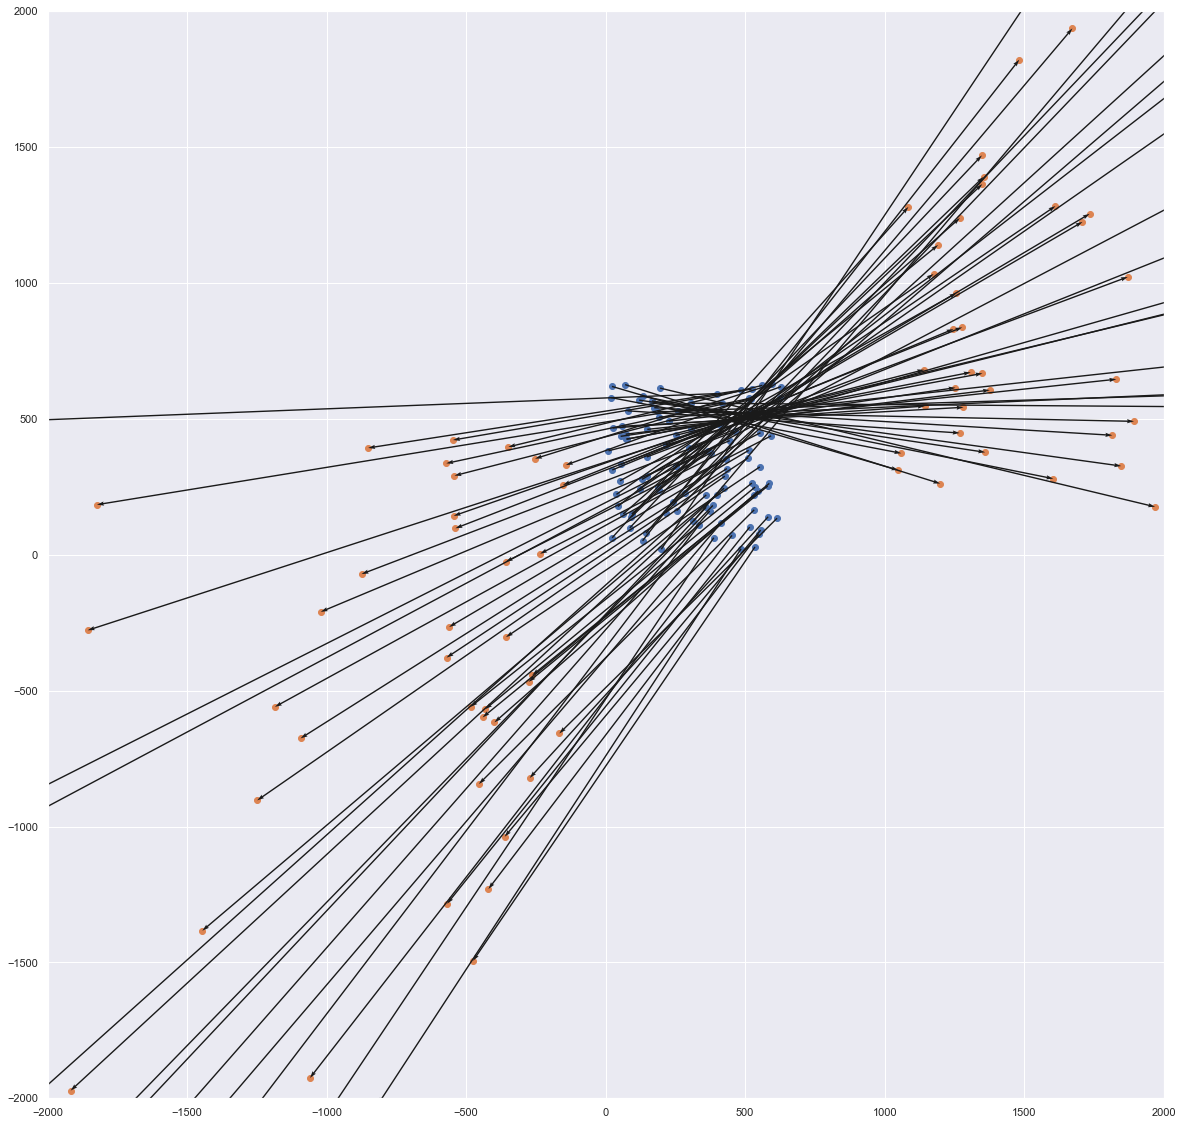

[[-0.99458758 -0.10390159  0.        ]
 [ 0.10390159 -0.99458758  0.        ]
 [ 0.          0.          1.        ]]
[  0.         -72.81137132   0.        ]
[  0.           0.         174.03611392]


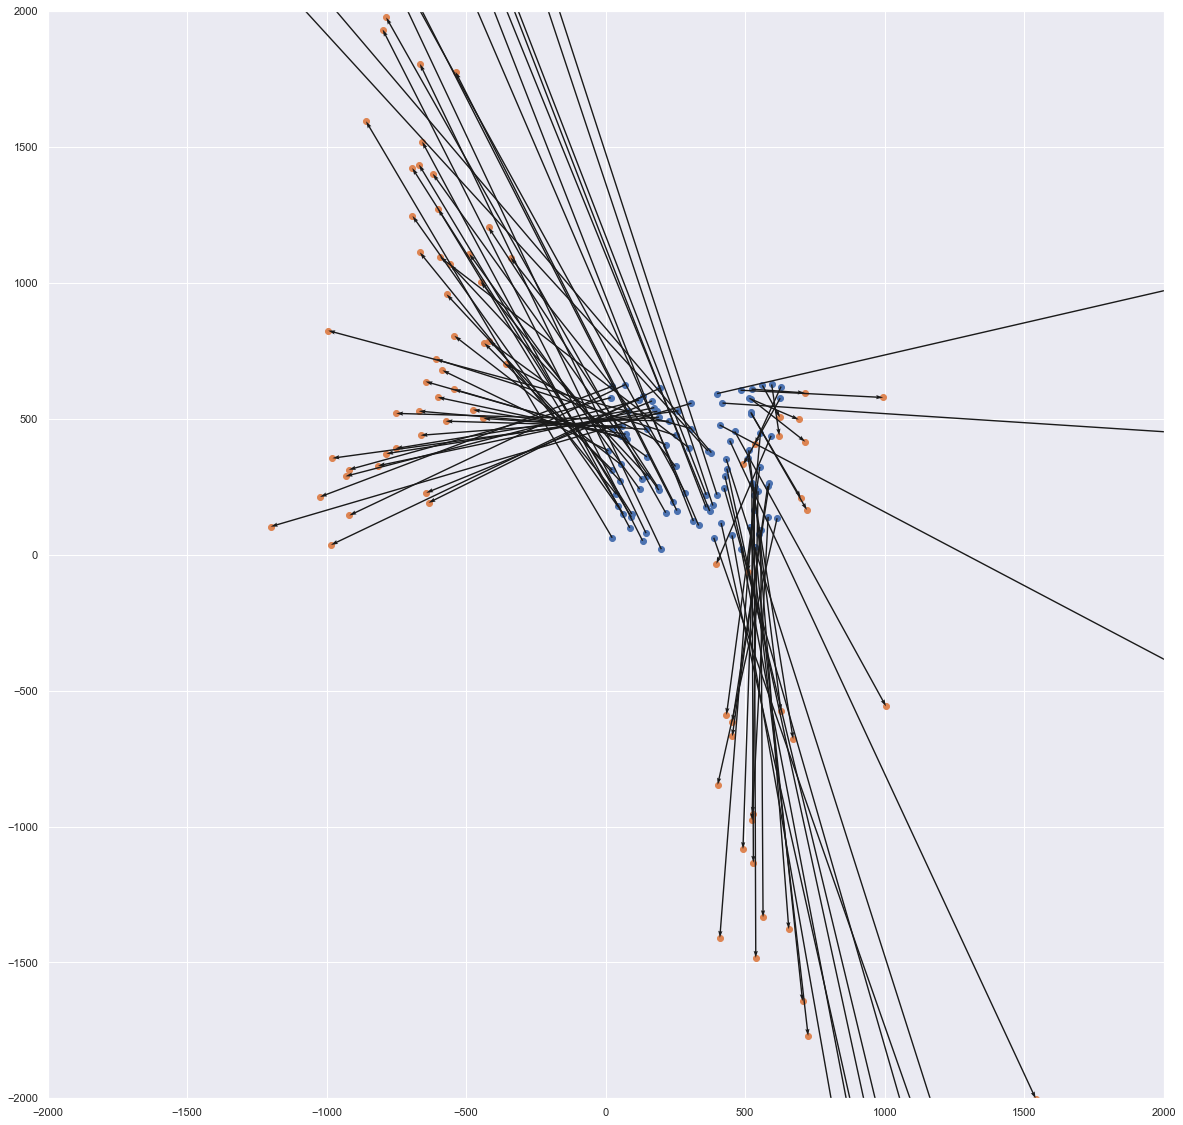

[[ 0.51963554 -0.85438803  0.        ]
 [ 0.85438803  0.51963554  0.        ]
 [ 0.          0.          1.        ]]
[ 180.          -44.11937645 -180.        ]
[ 0.          0.         58.69219278]


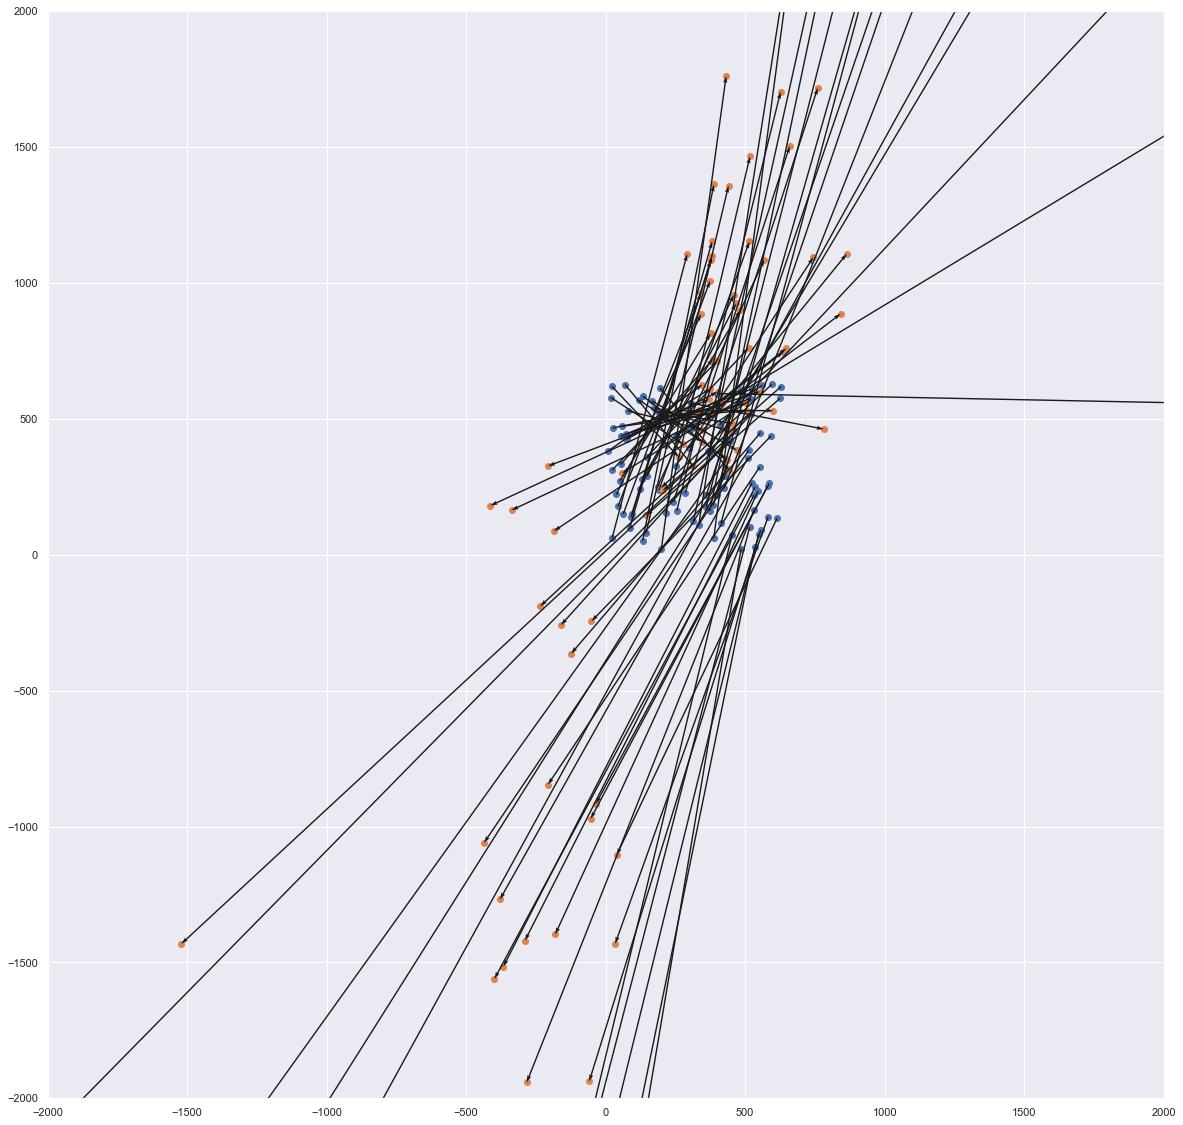

[[-0.69330357 -0.72064566  0.        ]
 [ 0.72064566 -0.69330357  0.        ]
 [ 0.          0.          1.        ]]
[ 180.          -77.87003248 -180.        ]
[  0.           0.         133.89218728]


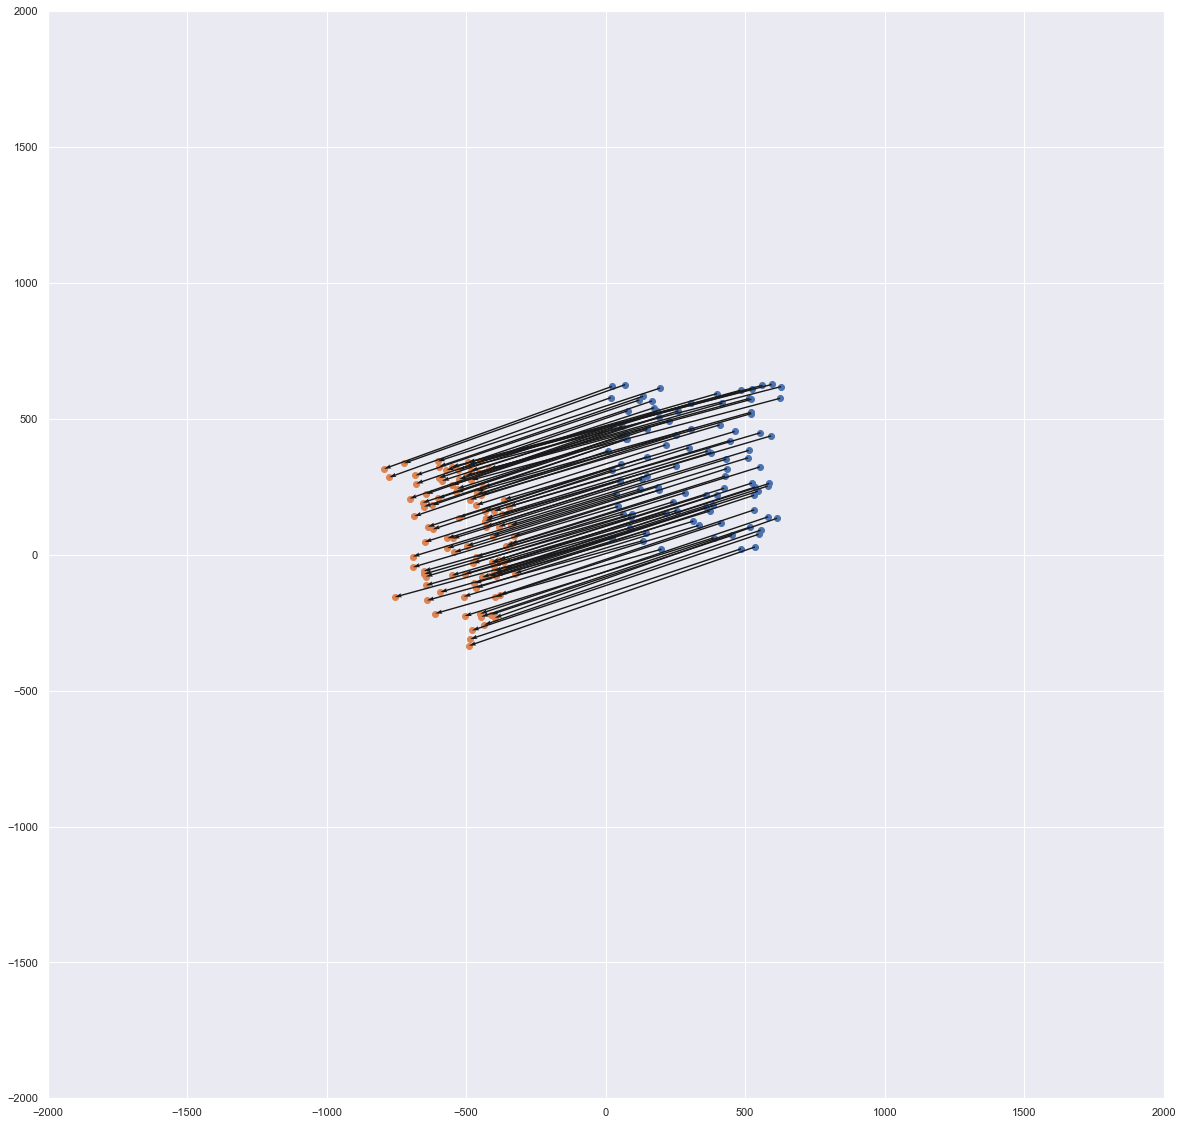

[[ 0.99826091 -0.0589504   0.        ]
 [ 0.0589504   0.99826091  0.        ]
 [ 0.          0.          1.        ]]
[ 0.         12.71645786  0.        ]
[0.         0.         3.37956829]


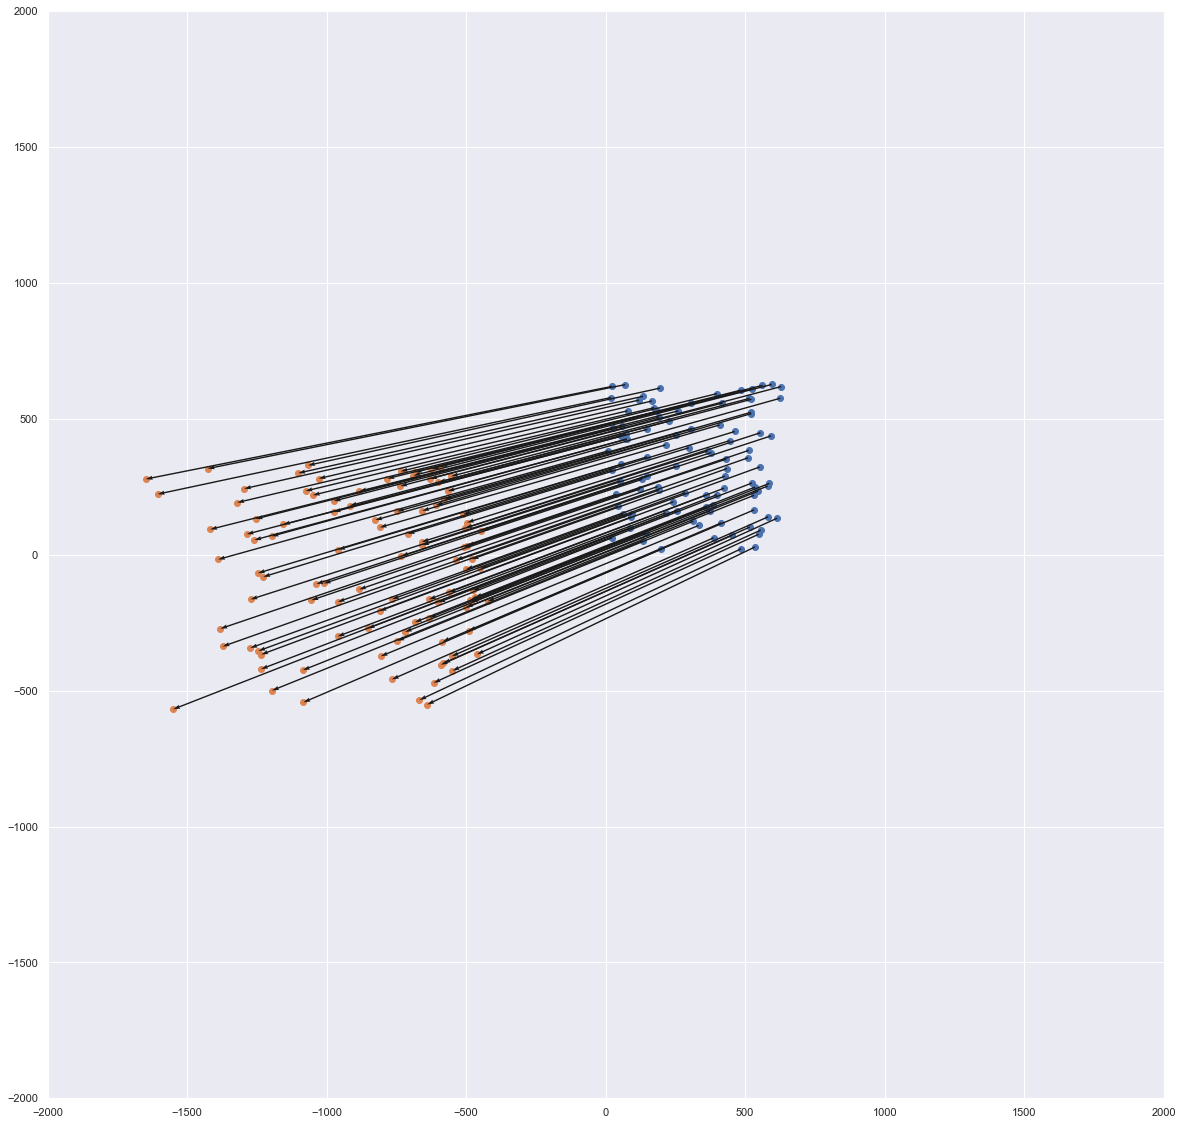

[[ 0.99864555  0.05202945  0.        ]
 [-0.05202945  0.99864555 -0.        ]
 [-0.          0.          1.        ]]
[ 0.         -6.34295574  0.        ]
[ 0.          0.         -2.98241442]


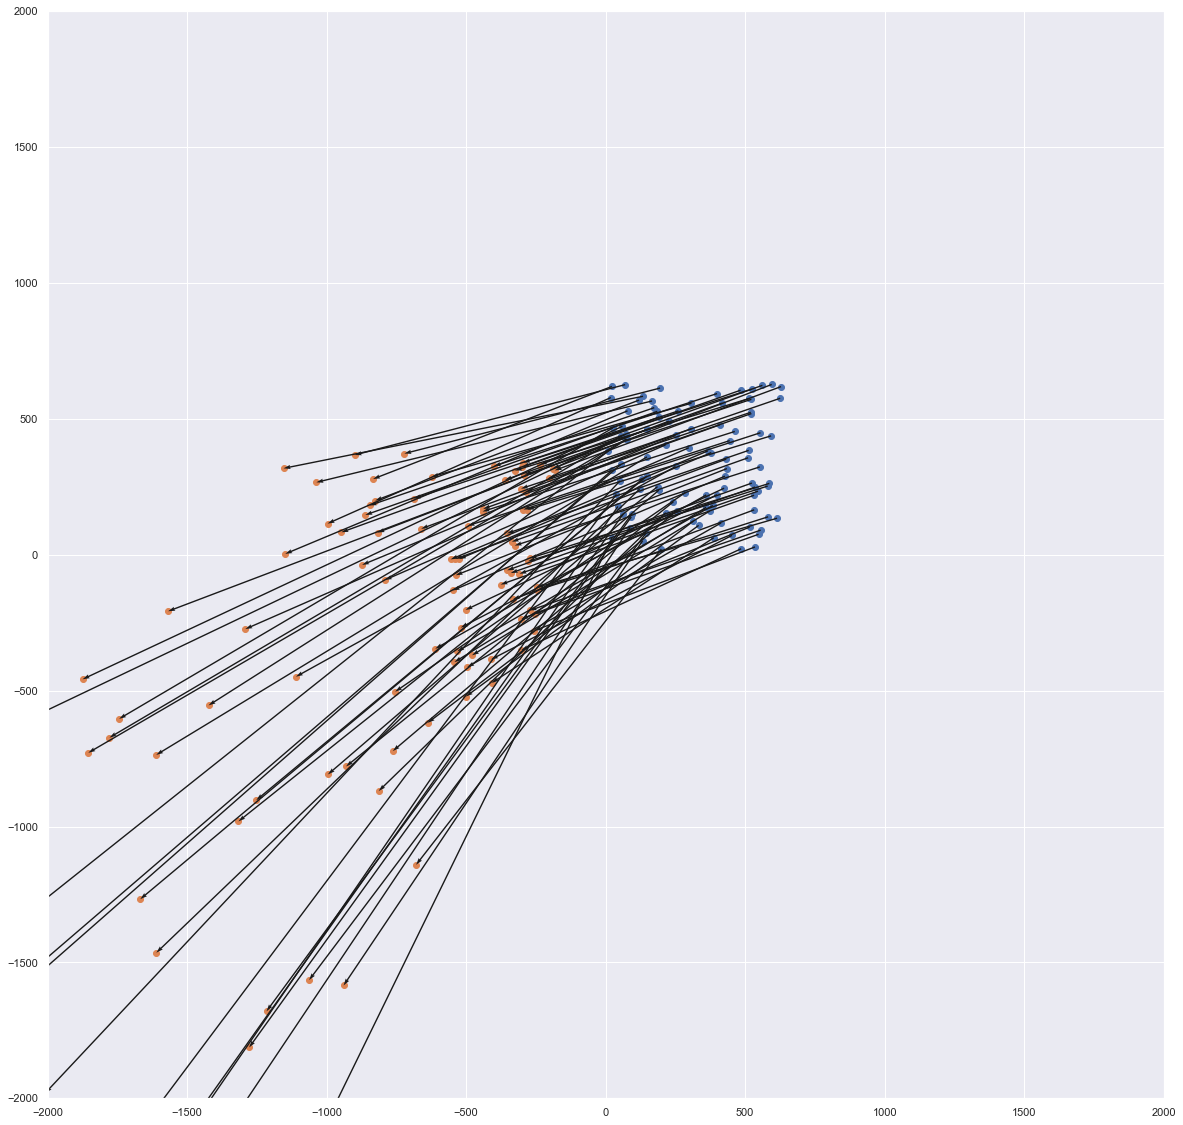

[[ 0.89376707  0.4485314   0.        ]
 [-0.4485314   0.89376707 -0.        ]
 [-0.          0.          1.        ]]
[ 180.          -55.49276048 -180.        ]
[  0.           0.         -26.64949923]


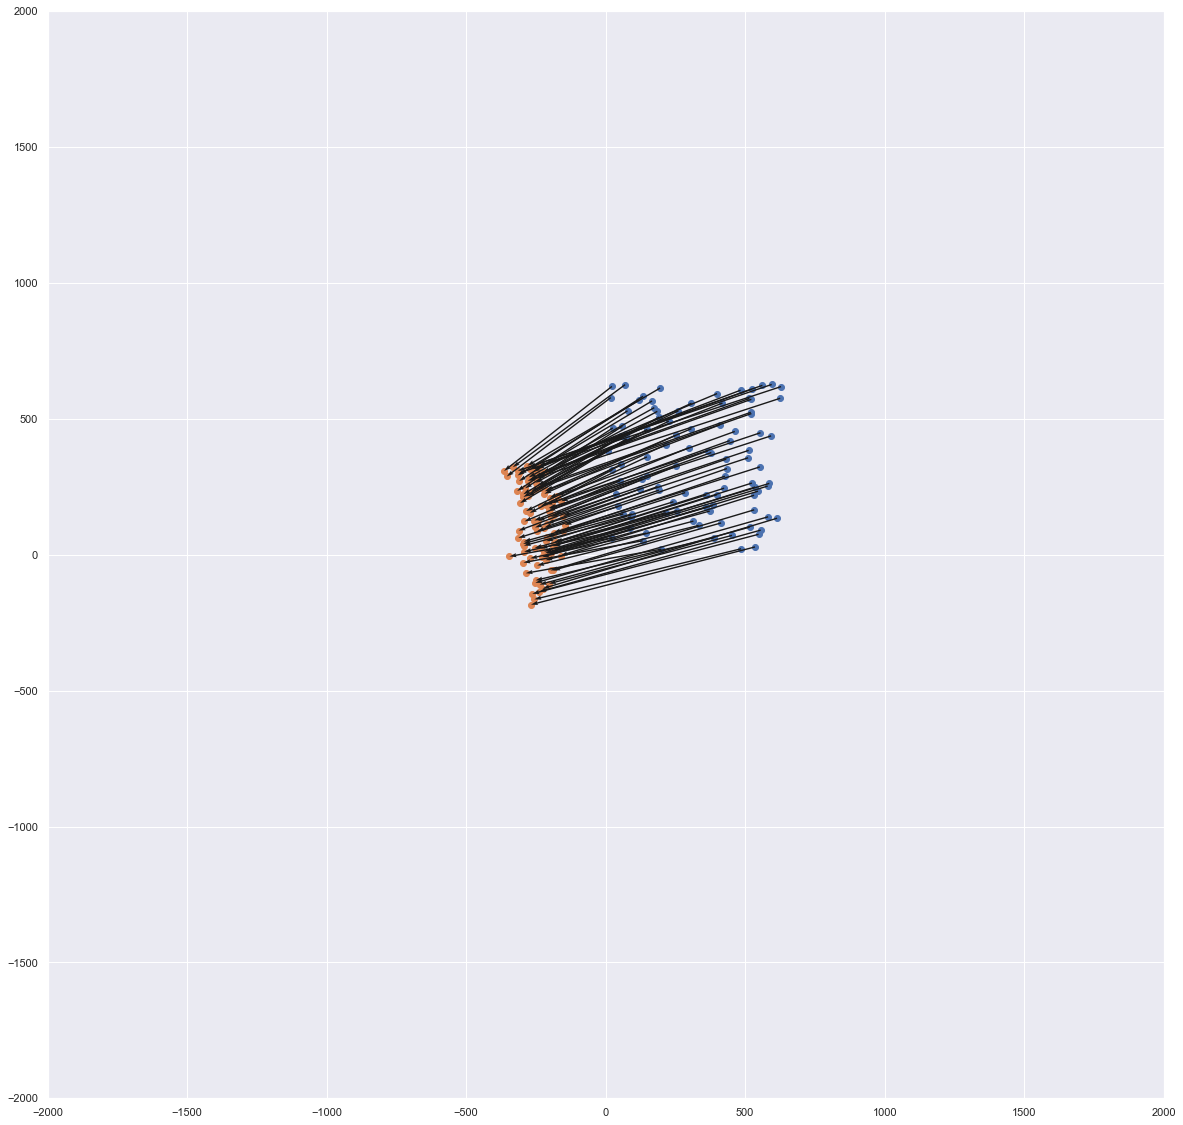

[[ 0.9882656  -0.15274521  0.        ]
 [ 0.15274521  0.9882656   0.        ]
 [ 0.          0.          1.        ]]
[ 0.       30.991568  0.      ]
[0.         0.         8.78604898]


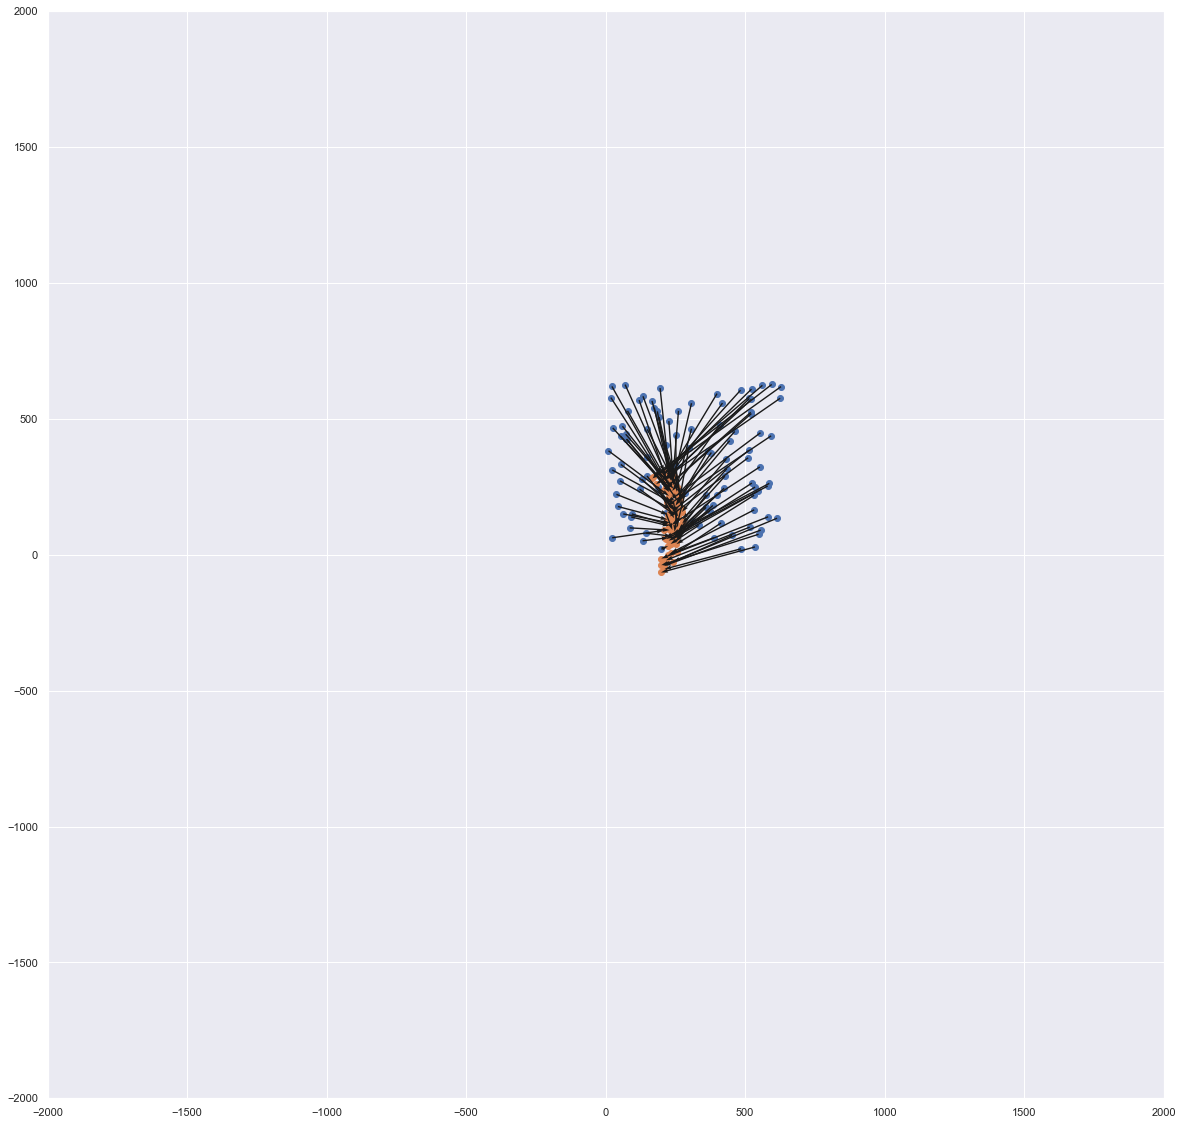

[[ 0.95297532 -0.30304791  0.        ]
 [ 0.30304791  0.95297532  0.        ]
 [ 0.          0.          1.        ]]
[ 0.         78.09679015  0.        ]
[ 0.          0.         17.64076025]


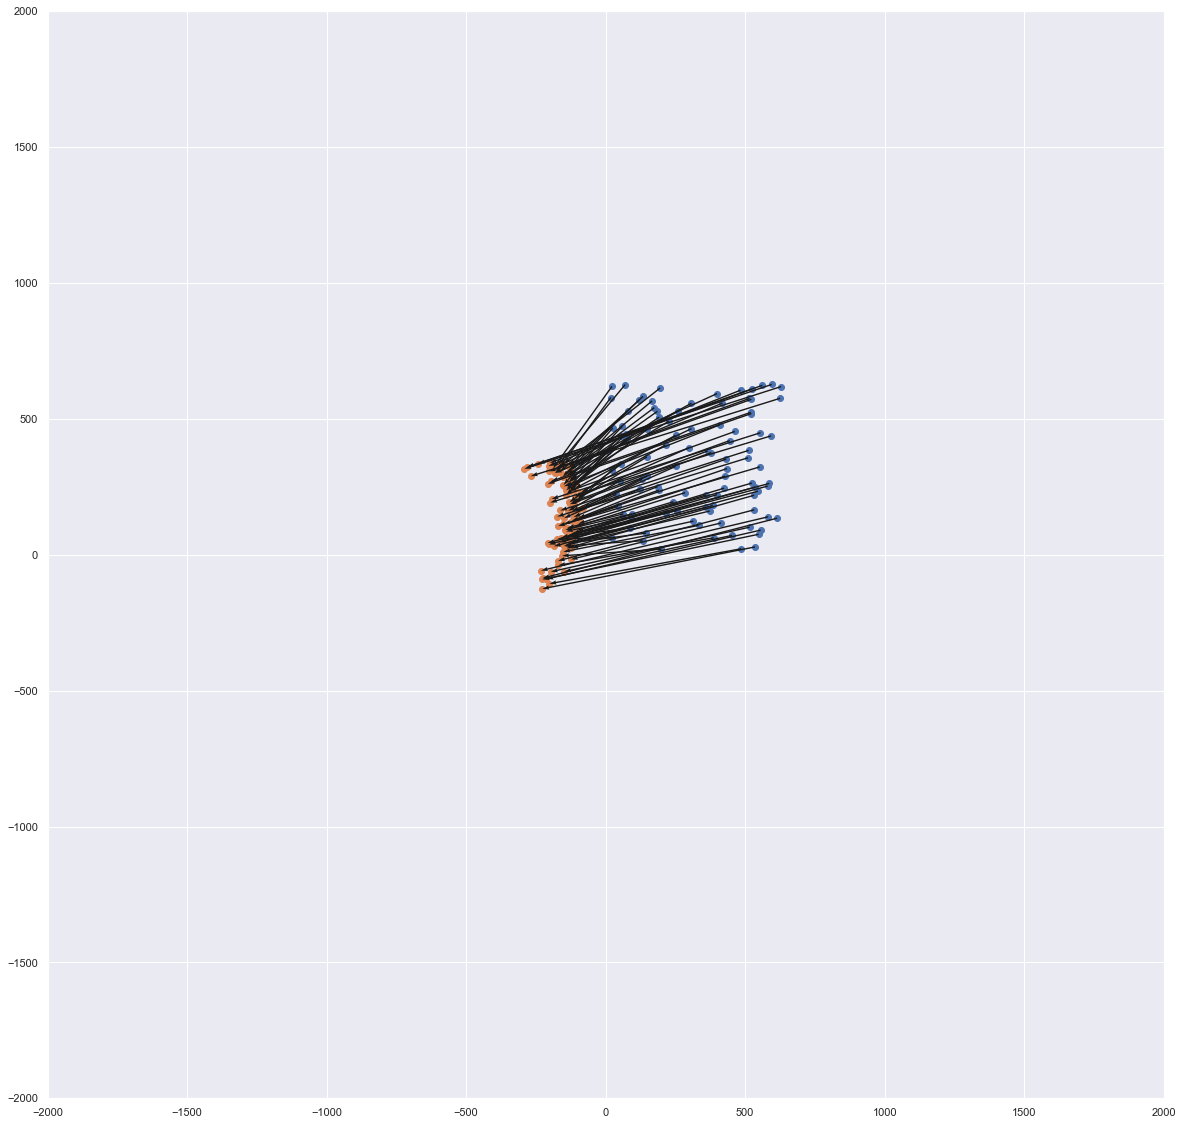

[[ 0.9550216  -0.29653625  0.        ]
 [ 0.29653625  0.9550216   0.        ]
 [ 0.          0.          1.        ]]
[ 0.        52.1403094  0.       ]
[ 0.          0.         17.24968038]


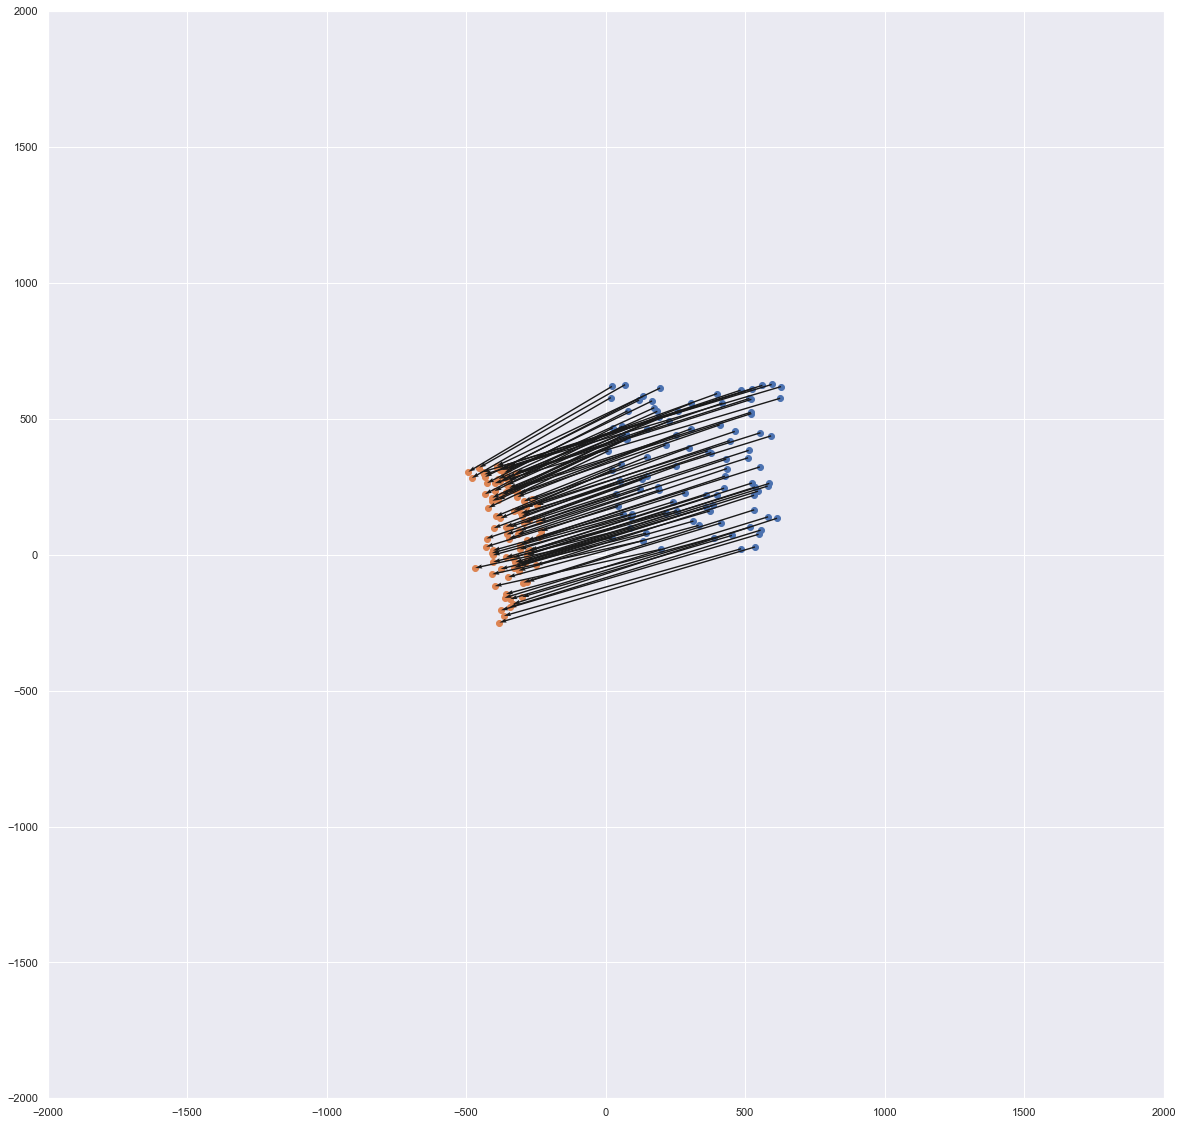

[[ 0.98869792 -0.14992138  0.        ]
 [ 0.14992138  0.98869792  0.        ]
 [ 0.          0.          1.        ]]
[ 0.         26.95660782  0.        ]
[0.         0.         8.62237022]


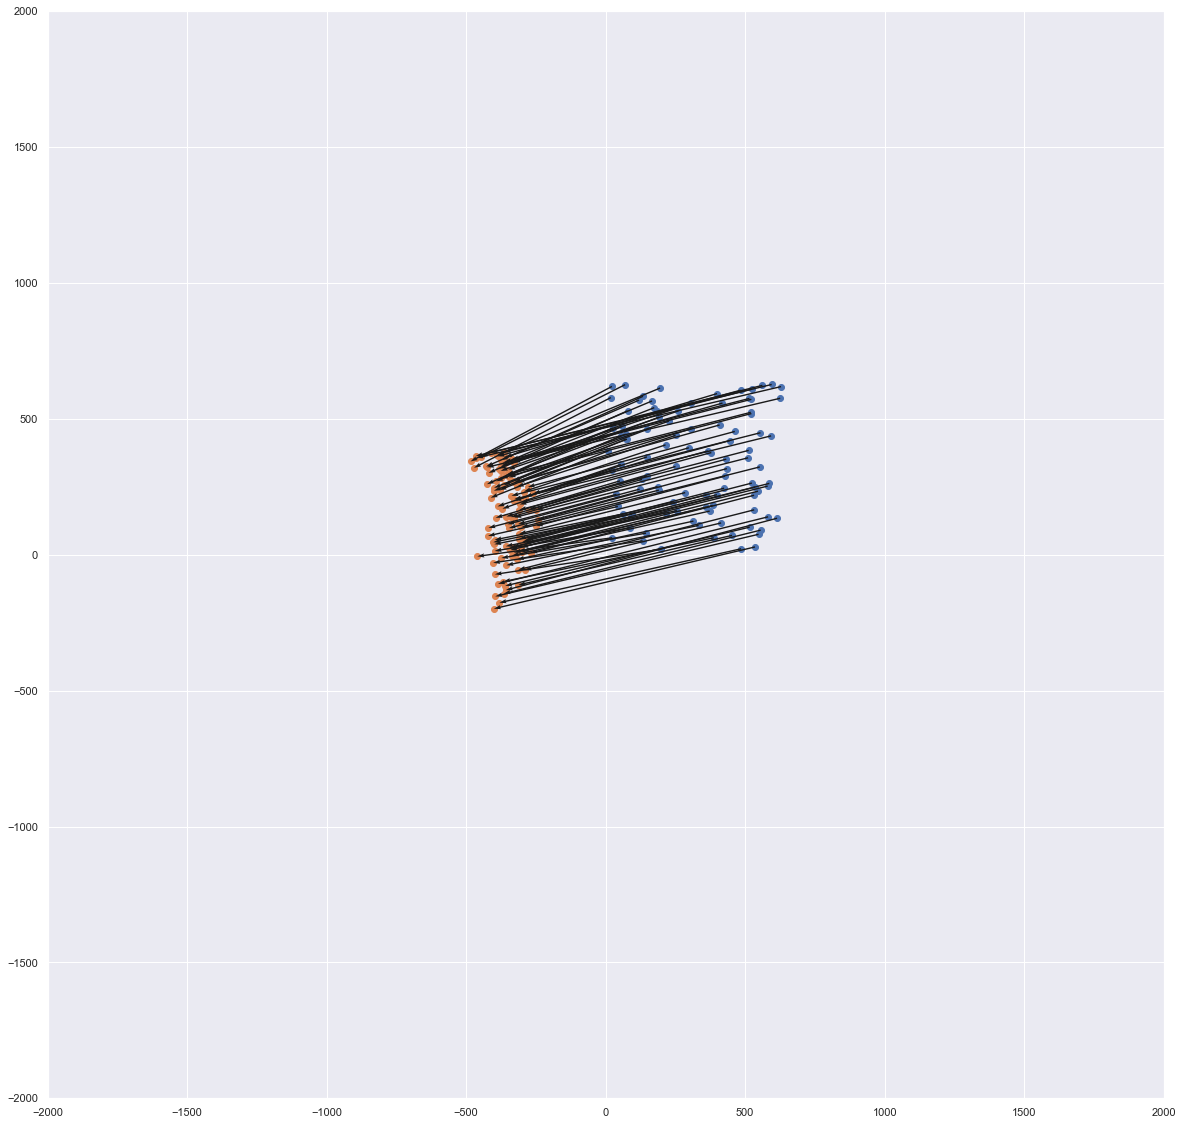

[[ 0.99165561 -0.12891526  0.        ]
 [ 0.12891526  0.99165561  0.        ]
 [ 0.          0.          1.        ]]
[ 0.         29.10580973  0.        ]
[0.         0.         7.40691382]


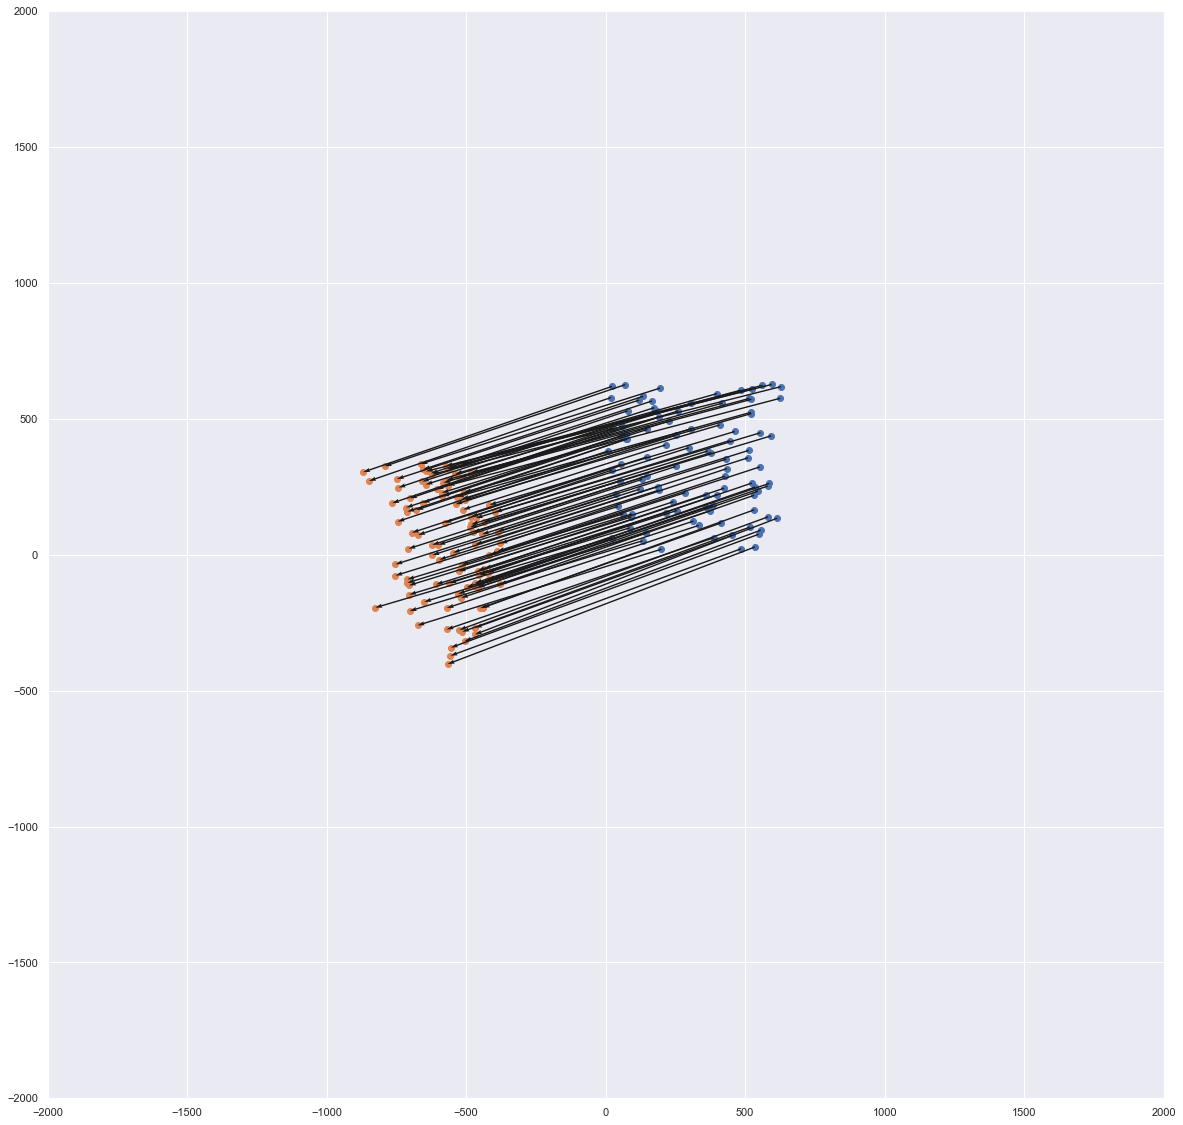

[[ 0.99742864 -0.07166662  0.        ]
 [ 0.07166662  0.99742864  0.        ]
 [ 0.          0.          1.        ]]
[ 0.         13.05027013  0.        ]
[0.         0.         4.10971775]


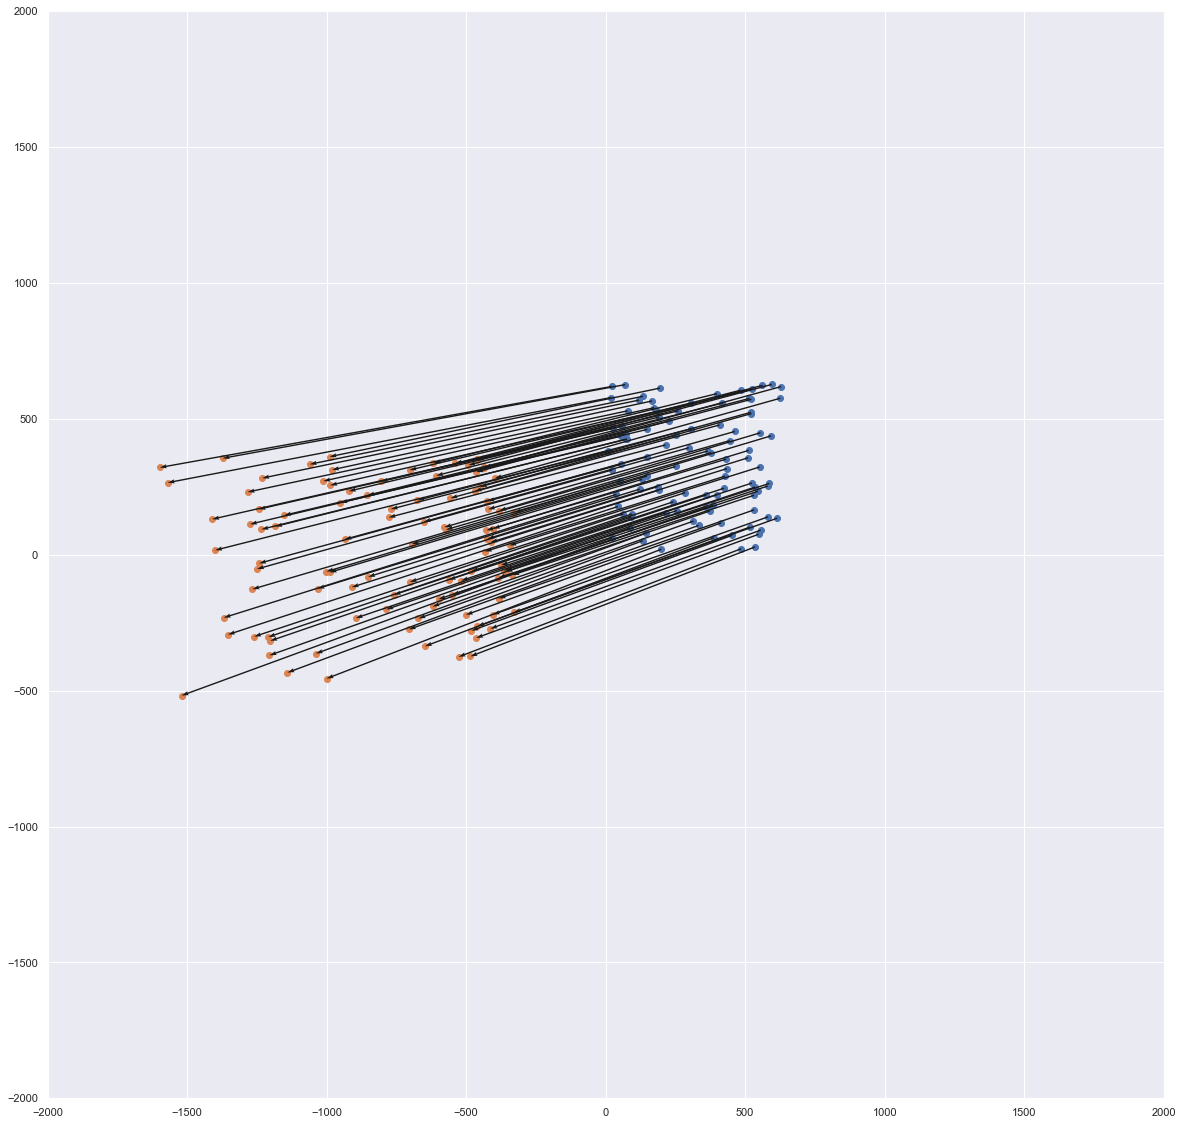

[[ 0.99679484  0.0800003   0.        ]
 [-0.0800003   0.99679484 -0.        ]
 [-0.          0.          1.        ]]
[  0.         -14.74310025   0.        ]
[ 0.         0.        -4.5885828]


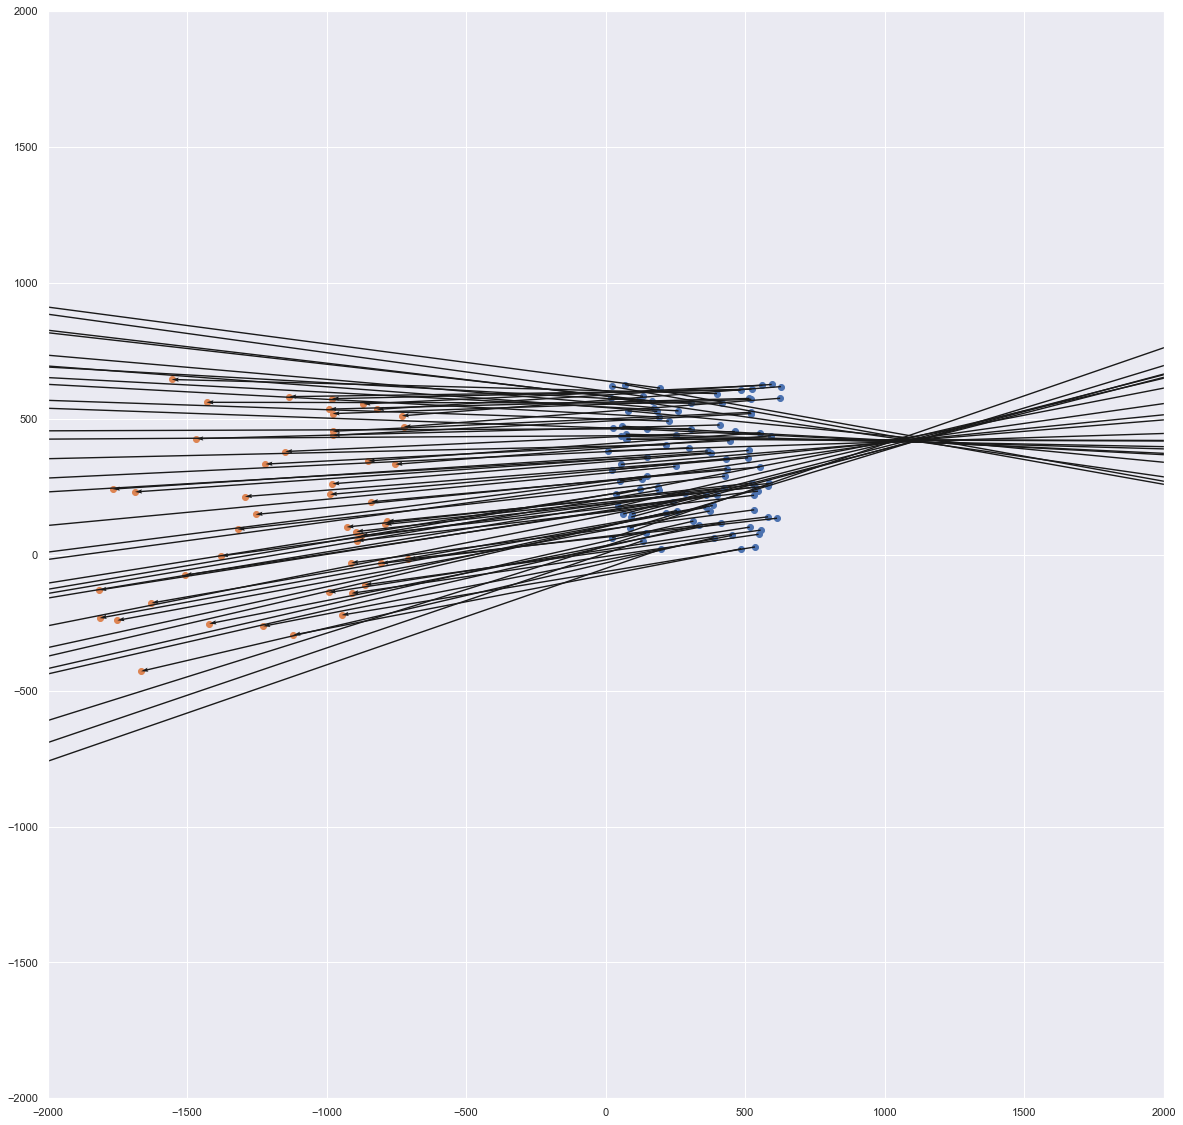

[[-0.98939624  0.14524143  0.        ]
 [-0.14524143 -0.98939624 -0.        ]
 [-0.          0.          1.        ]]
[  0.        -77.7658998   0.       ]
[   0.            0.         -171.64873975]


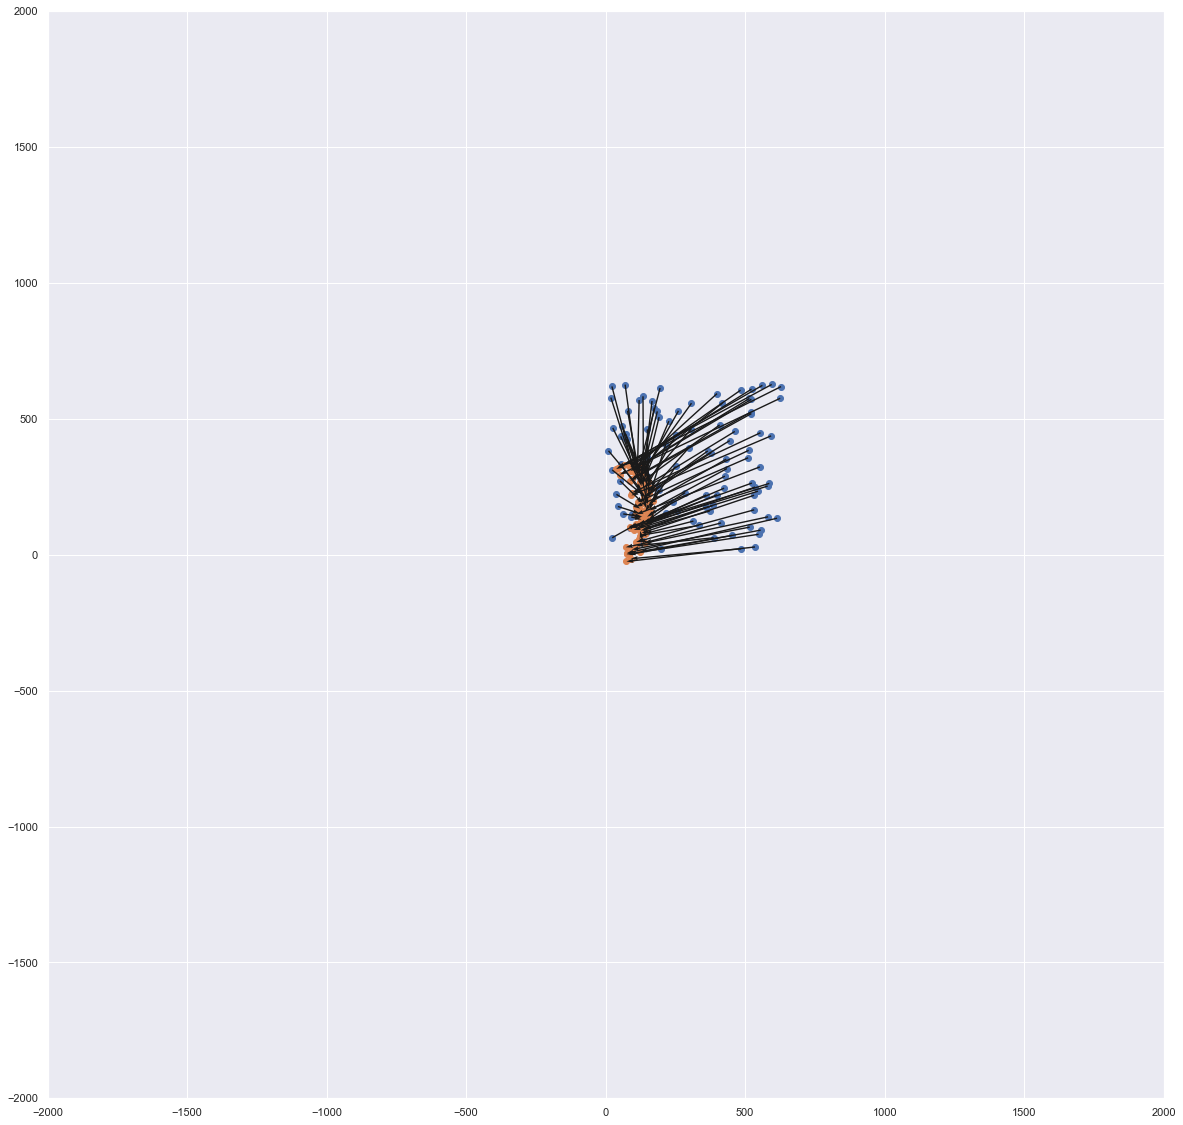

[[ 0.95999154 -0.28002902  0.        ]
 [ 0.28002902  0.95999154  0.        ]
 [ 0.          0.          1.        ]]
[ 0.         72.94417635  0.        ]
[ 0.          0.         16.26193663]


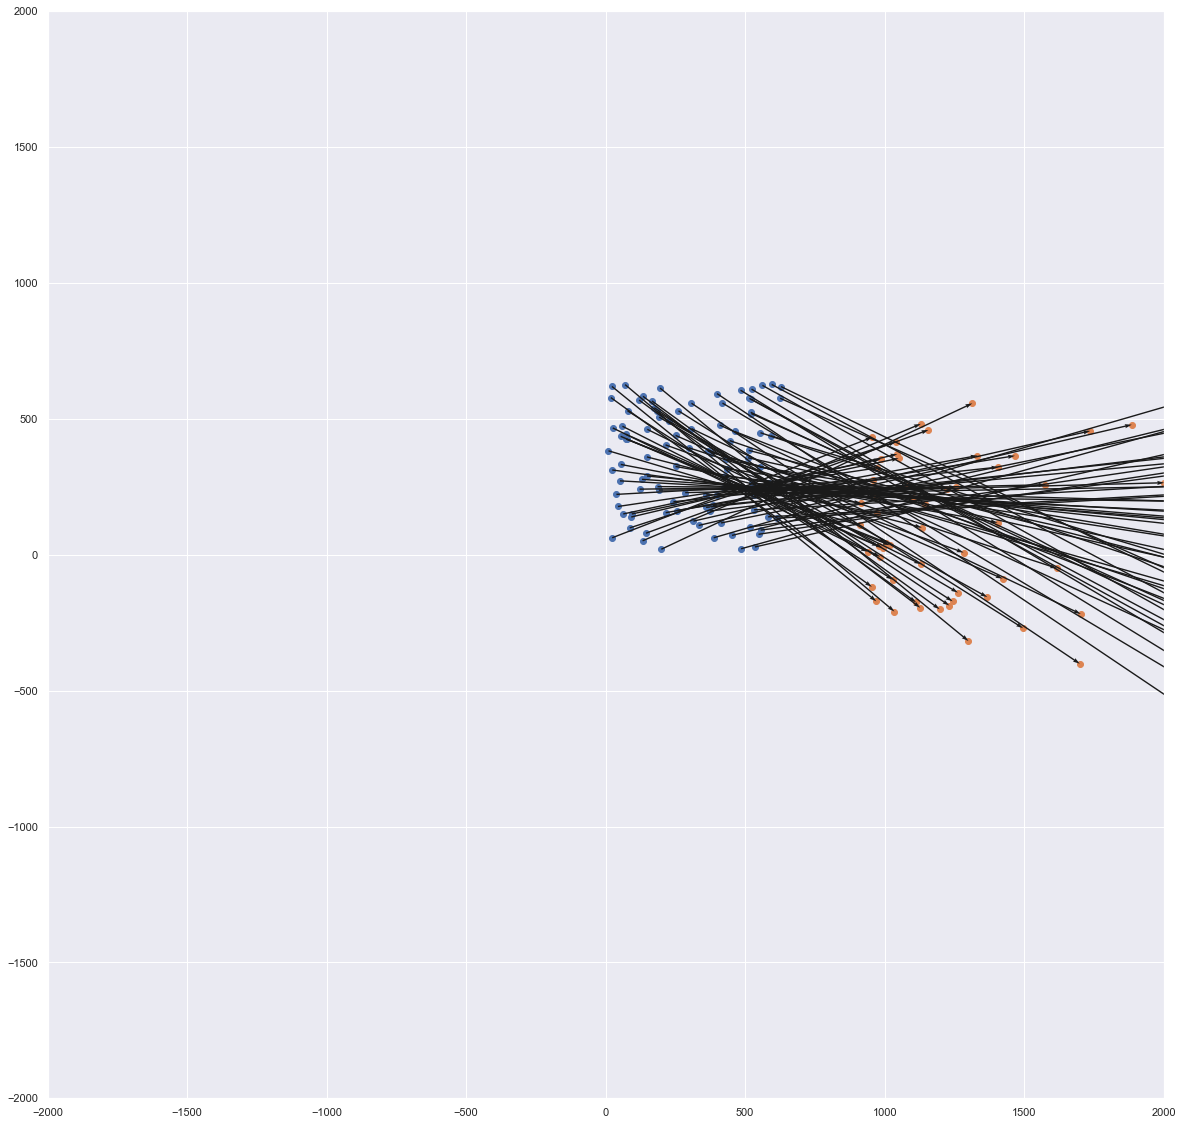

[[ 0.63173335 -0.77518577  0.        ]
 [ 0.77518577  0.63173335  0.        ]
 [ 0.          0.          1.        ]]
[ 180.         -53.9035104 -180.       ]
[ 0.          0.         50.82187783]


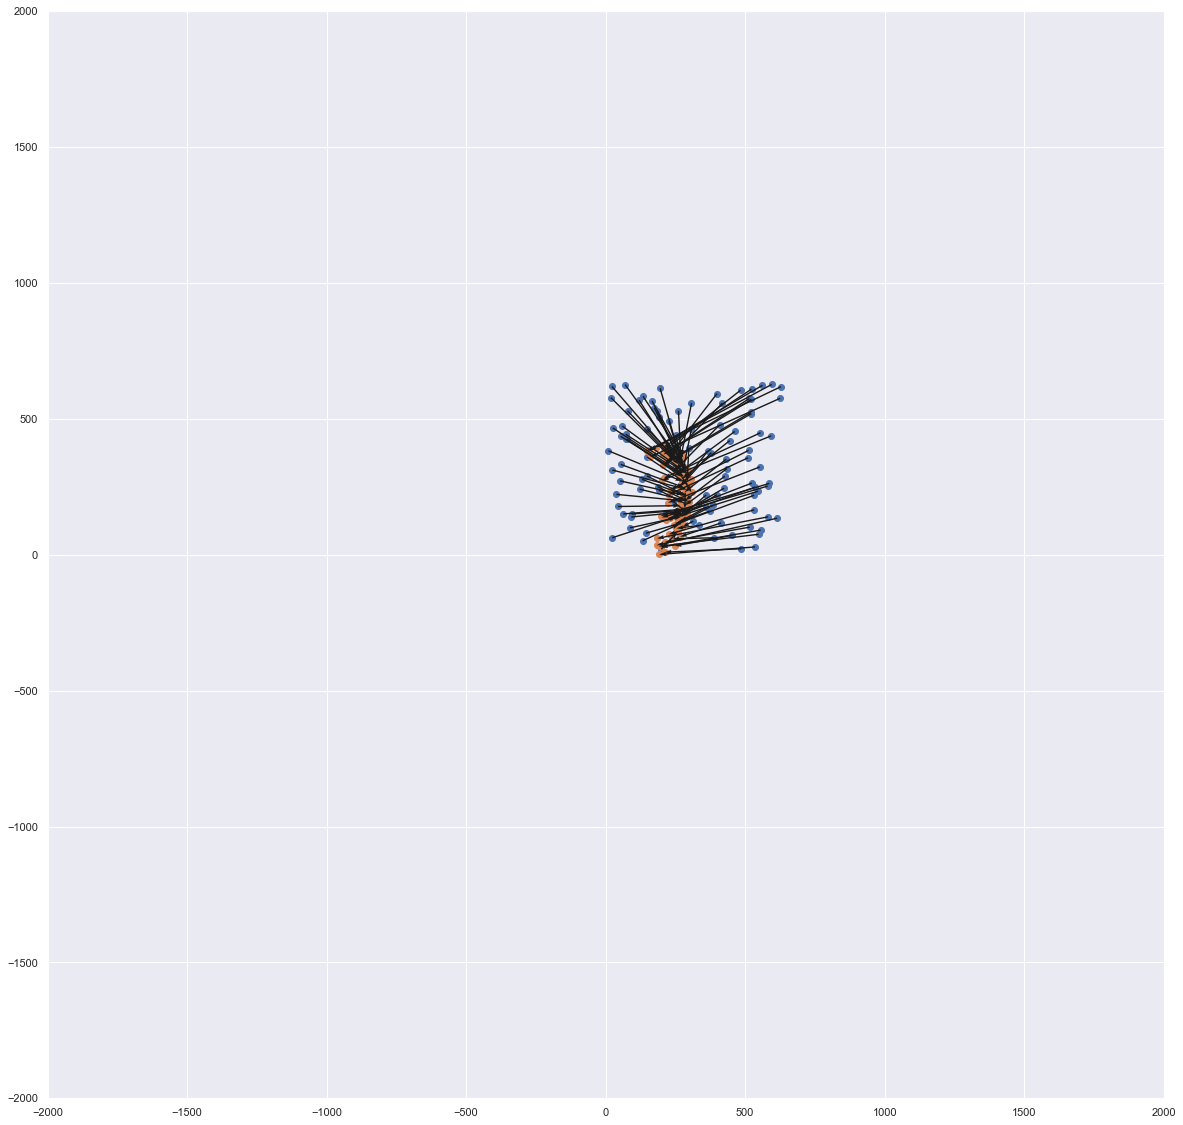

[[ 0.97199876 -0.234986    0.        ]
 [ 0.234986    0.97199876  0.        ]
 [ 0.          0.          1.        ]]
[ 180.           88.54212056 -180.        ]
[ 0.          0.         13.59079726]


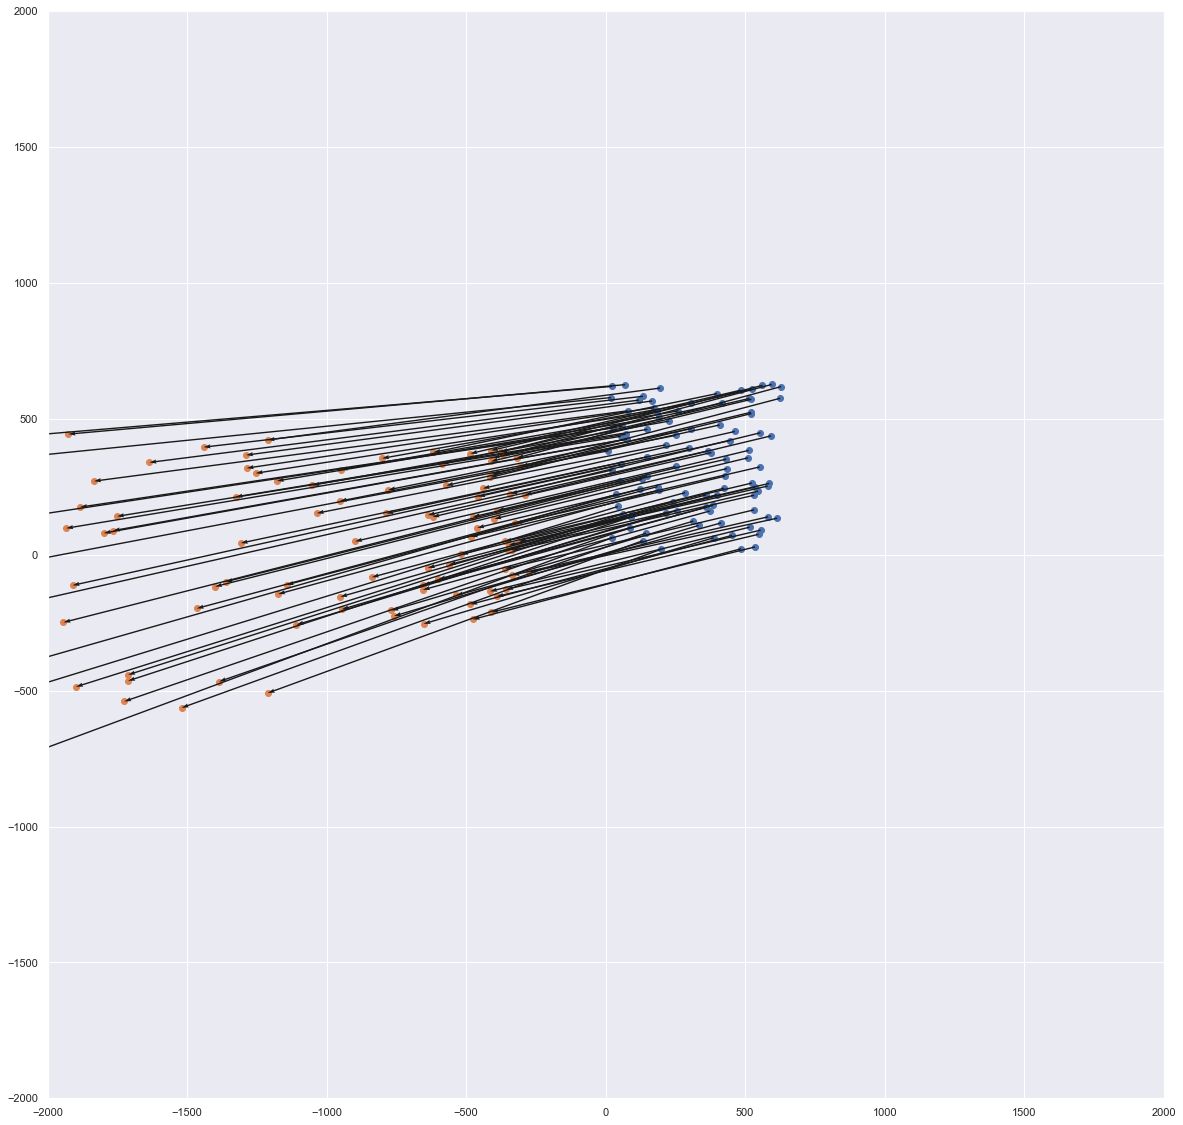

[[ 0.99095131  0.13422182  0.        ]
 [-0.13422182  0.99095131 -0.        ]
 [-0.          0.          1.        ]]
[  0.         -41.89493177   0.        ]
[ 0.          0.         -7.71362393]


In [49]:
BASE = "prerot"
for p in os.listdir(BASE):
    with open(os.path.join(BASE, p), "rb") as handle:
        scene = pickle.load(handle)
        
    vis_scene(scene)
    rot_mtx = get_prerotation_ls(scene)
    print(rot_mtx)
    
    print(Rotation.from_matrix(scene.R).as_euler("XYZ", degrees=True))
    print(Rotation.from_matrix(rot_mtx).as_euler("XYZ", degrees=True))
    
    # break

In [44]:
scene

PrerotationScene(R=array([[ 0.29551845,  0.        , -0.95533703],
       [ 0.        ,  1.        ,  0.        ],
       [ 0.95533703,  0.        ,  0.29551845]]), t=array([ 0.42693942, -0.20656982,  0.41173281]), X=array([[-3.84360658e-01,  1.92180815e-01,  7.71474308e-01],
       [-3.26338897e-01, -3.63883329e-01,  8.03723366e-01],
       [-1.00750530e+00, -2.74503299e-01,  8.97972384e-01],
       [-7.11372651e-01, -5.70199043e-01,  8.98186485e-01],
       [-6.24922894e-01, -4.05185507e-01,  9.25084014e-01],
       [-3.84469968e-01,  2.56931011e-01,  7.76226338e-01],
       [-2.31100509e-01, -5.24089442e-01,  7.55389228e-01],
       [-3.79936962e-01, -1.59221309e-01,  8.17160929e-01],
       [-3.45043695e-01, -3.18815885e-01,  8.42764239e-01],
       [-9.42875330e-01,  1.33928603e-01,  8.56485289e-01],
       [-5.73626808e-01,  2.36392170e-01,  8.13433276e-01],
       [-5.99114327e-01, -6.48151356e-01,  8.10512590e-01],
       [-1.13877530e+00, -4.95518937e-01,  8.54578614e-01],
   

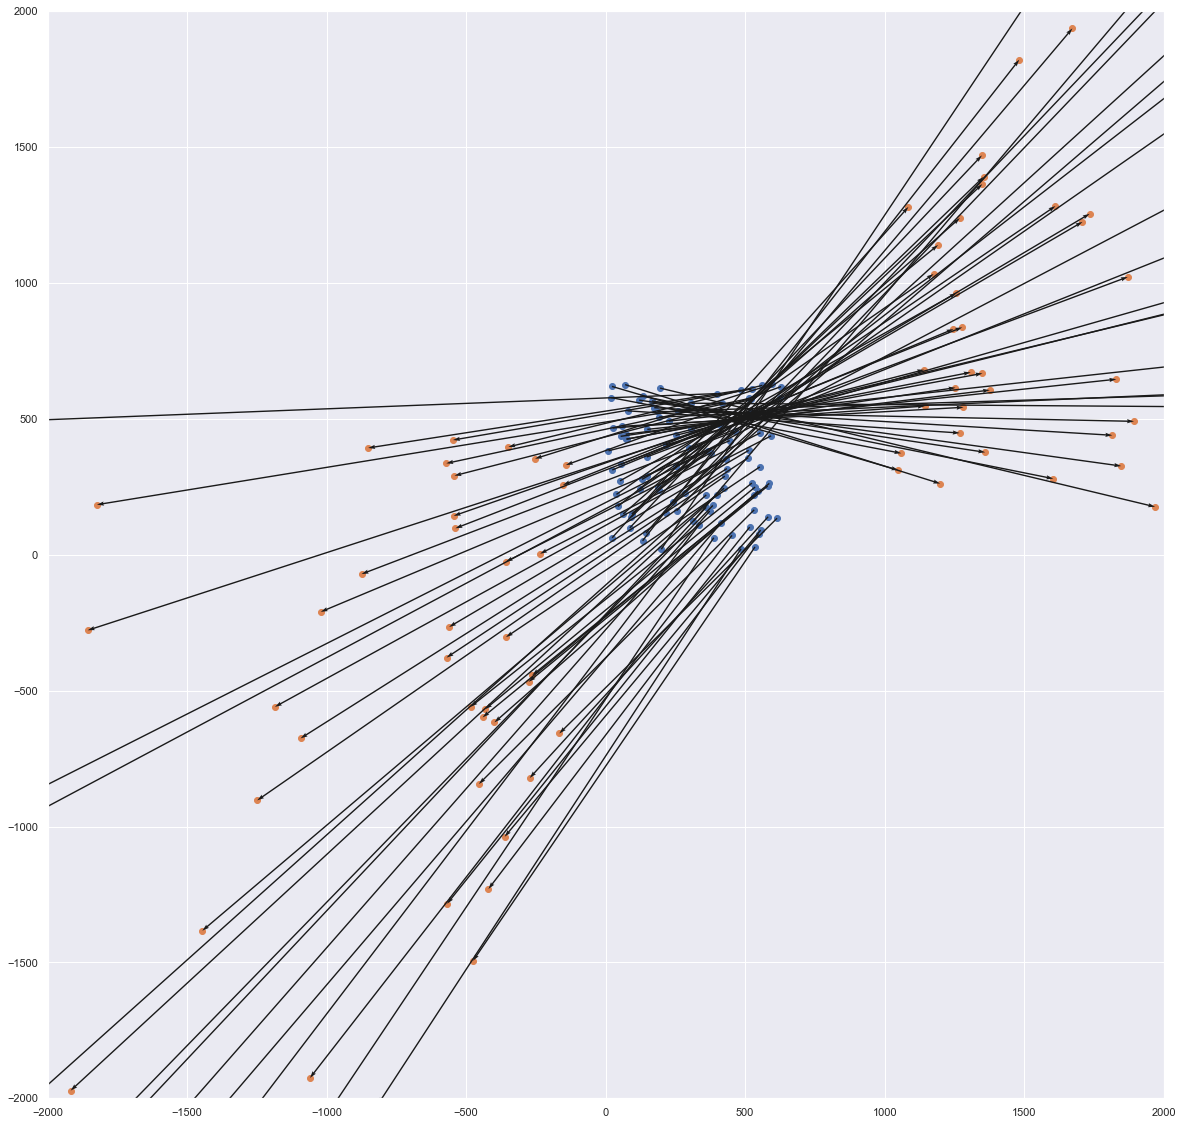

[[-0.99458758 -0.10390159  0.        ]
 [ 0.10390159 -0.99458758  0.        ]
 [ 0.          0.          1.        ]]
[  0.         -72.81137132   0.        ]
[  0.           0.         174.03611392]


In [45]:
vis_scene(scene)
rot_mtx = get_prerotation_ls(scene)
print(rot_mtx)
    
print(Rotation.from_matrix(scene.R).as_euler("XYZ", degrees=True))
print(Rotation.from_matrix(rot_mtx).as_euler("XYZ", degrees=True))

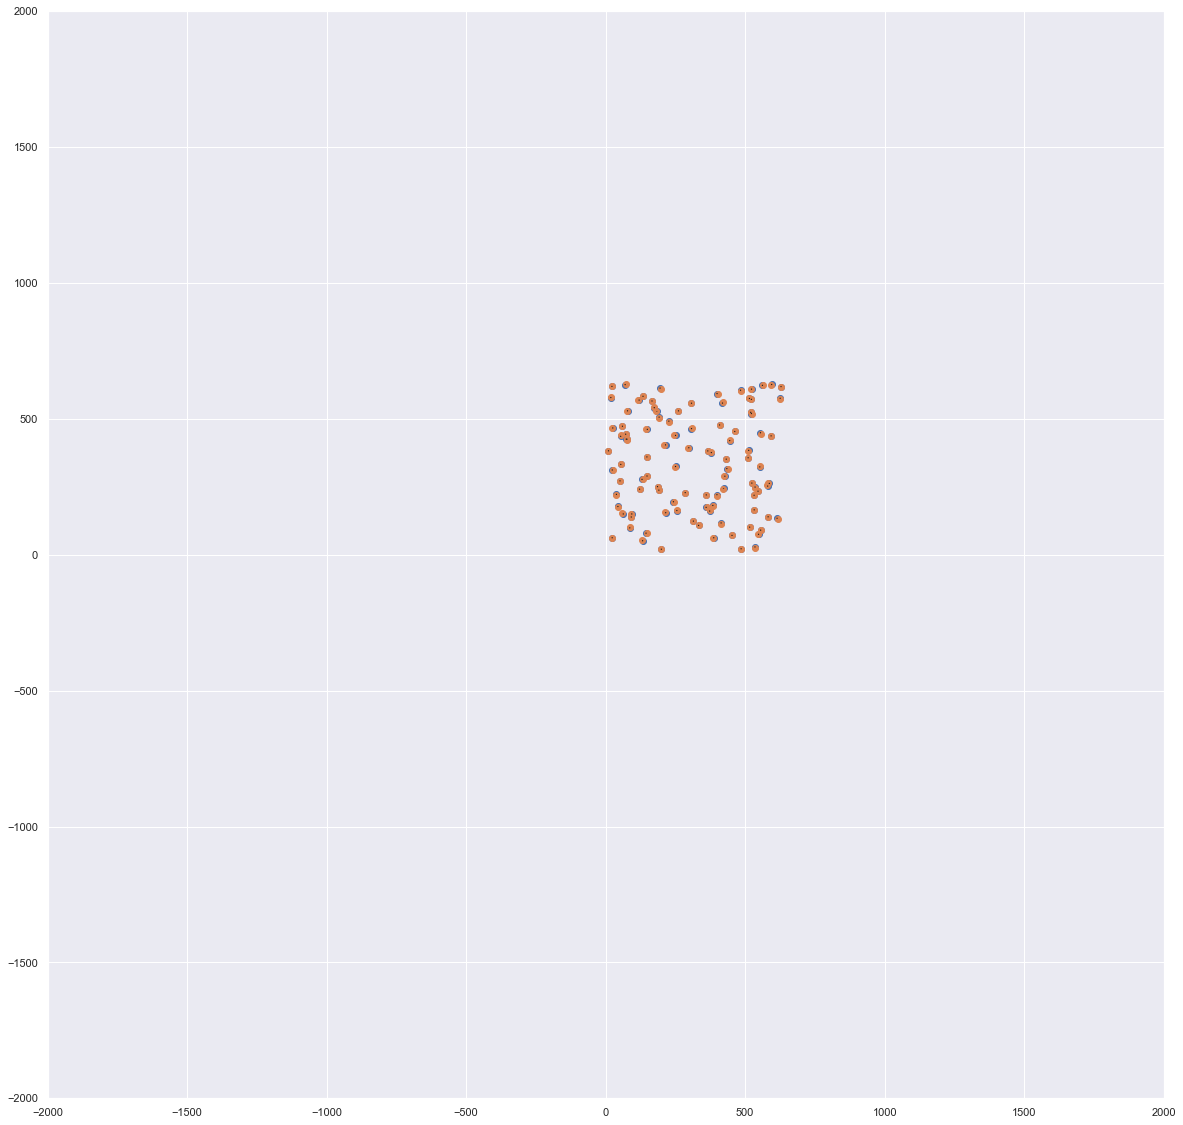

[[ 9.99999979e-01 -2.03121848e-04  0.00000000e+00]
 [ 2.03121848e-04  9.99999979e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[ 0. -5.  0.]
[0.         0.         0.01163802]


In [46]:
dummy_scene = scene
dummy_scene.R = Rotation.from_euler("XYZ", np.array([0., -5., 0.]), degrees=True).as_matrix()
# dummy_scene.t = np.array([0.17600203, 0.4197455, 0.38205123])
dummy_scene.t = np.array([0.7781053, 0.21868771, 0.16600406])
vis_scene(scene)
rot_mtx = get_prerotation_ls(scene)
print(rot_mtx)
    
print(Rotation.from_matrix(scene.R).as_euler("XYZ", degrees=True))
print(Rotation.from_matrix(rot_mtx).as_euler("XYZ", degrees=True))

In [ ]:
# [  0.          -4.99999961 -44.99999959] [0.1408878 0.4008602 0.5252841] 

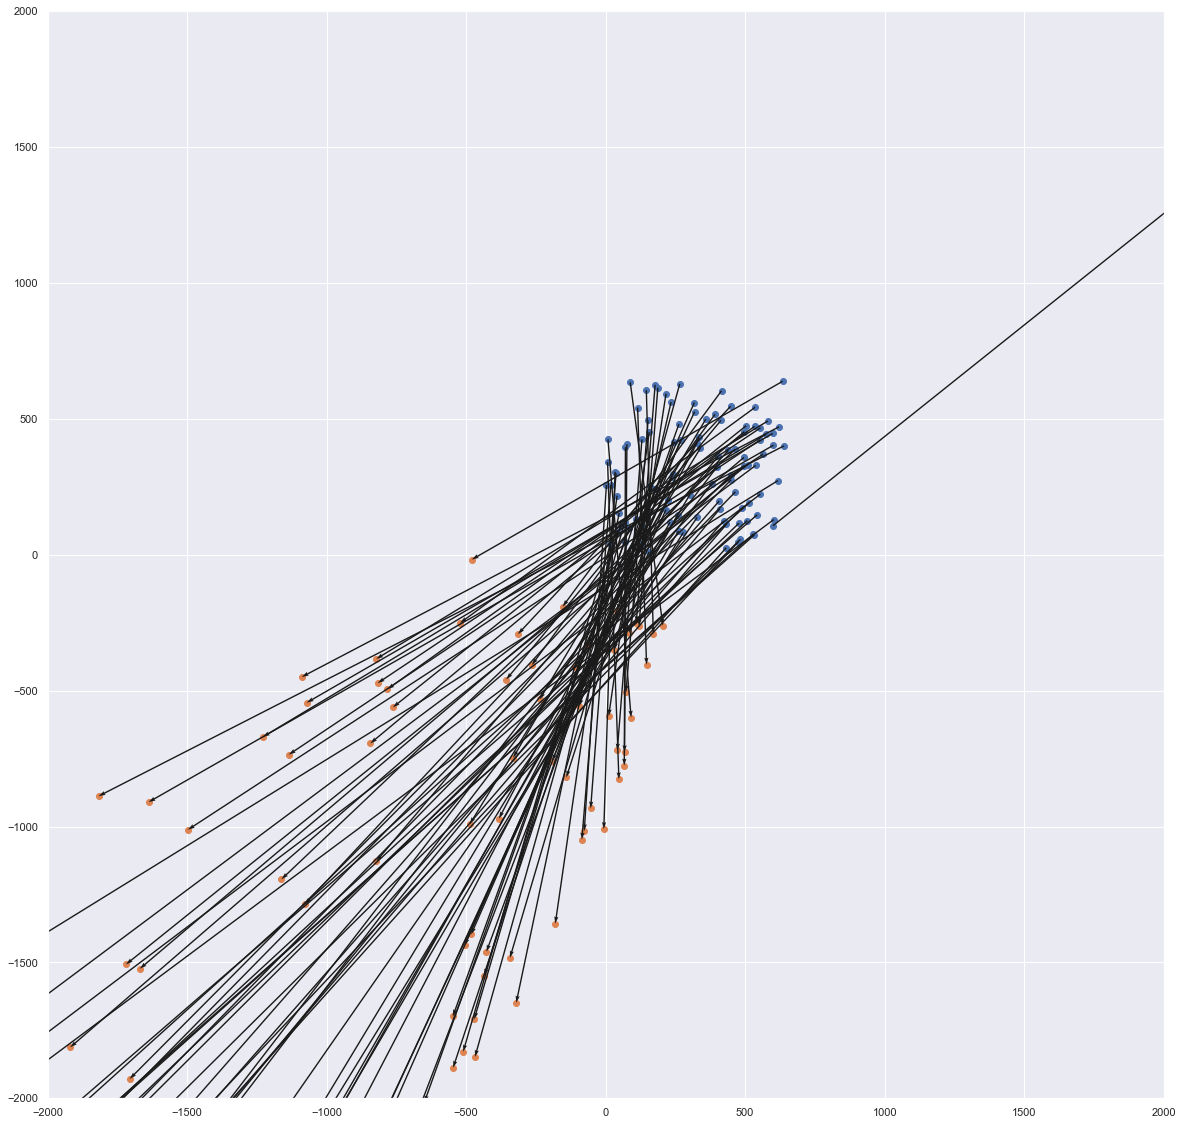

[[ 0.63404718 -0.77329436  0.        ]
 [ 0.77329436  0.63404718  0.        ]
 [ 0.          0.          1.        ]]
[ 180.           44.25968211 -180.        ]
[ 0.          0.         50.65064838]


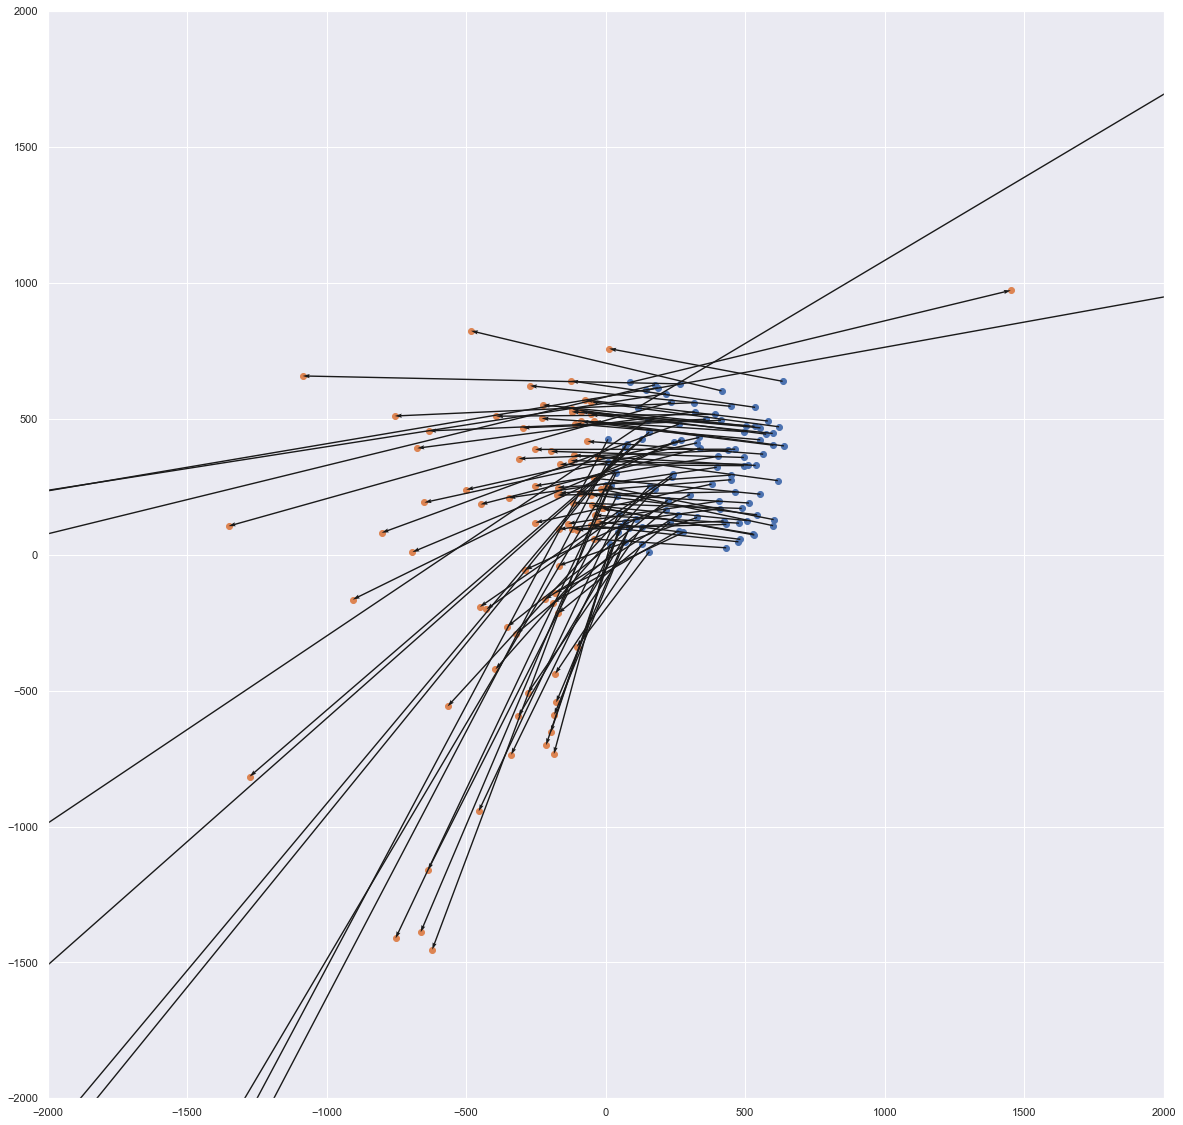

[[ 0.49082566  0.87125781  0.        ]
 [-0.87125781  0.49082566 -0.        ]
 [-0.          0.          1.        ]]
[ 180.          -68.52135962 -180.        ]
[  0.           0.         -60.60513574]


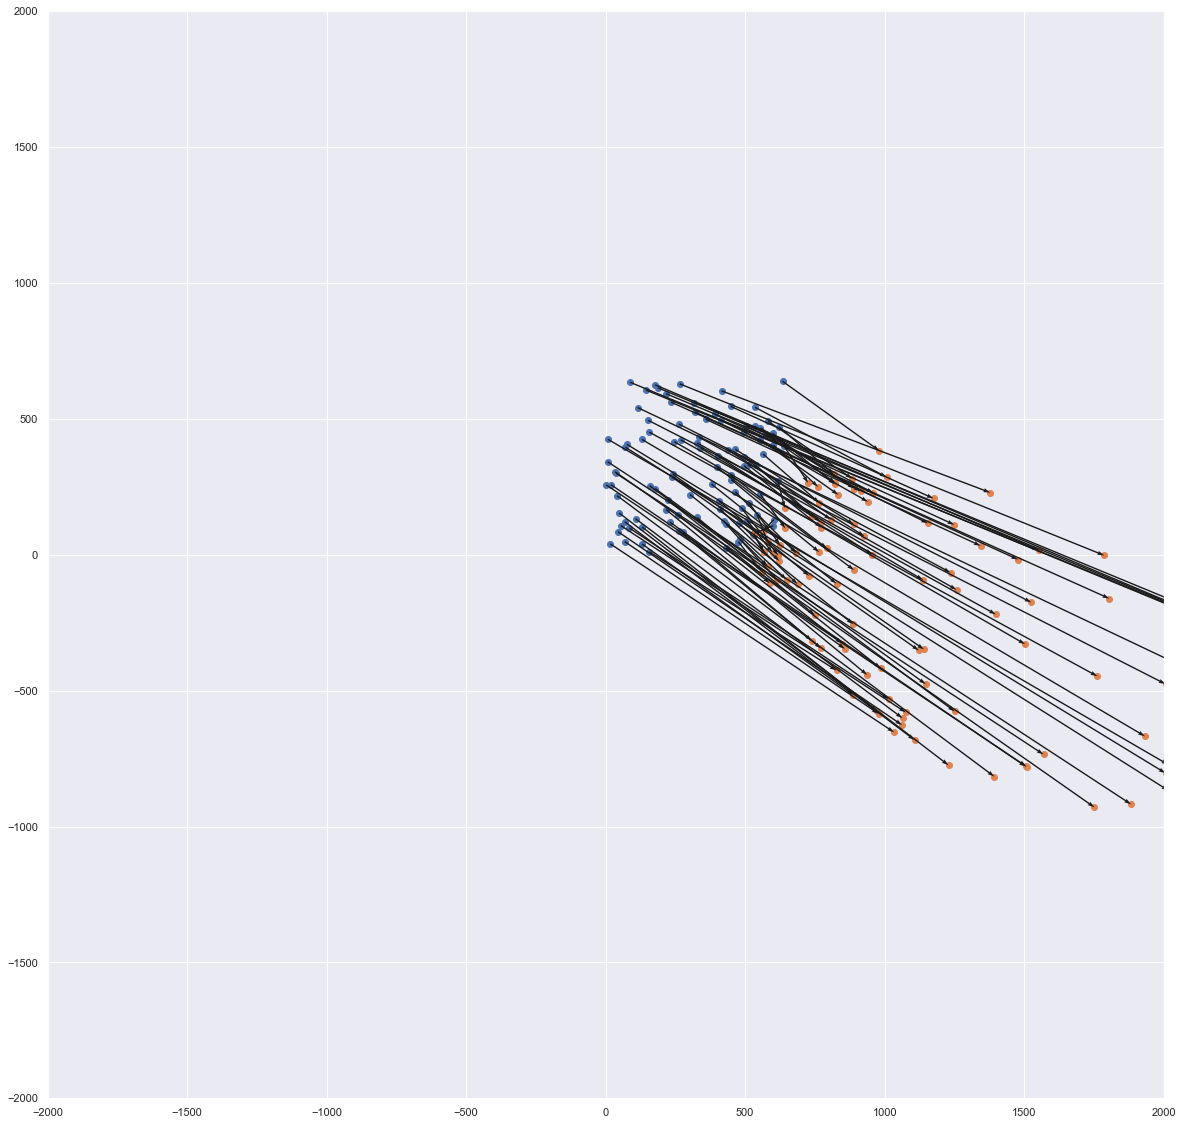

[[-0.98856093  0.15082207  0.        ]
 [-0.15082207 -0.98856093 -0.        ]
 [-0.          0.          1.        ]]
[ 180.          -38.83974542 -180.        ]
[   0.            0.         -171.32543028]


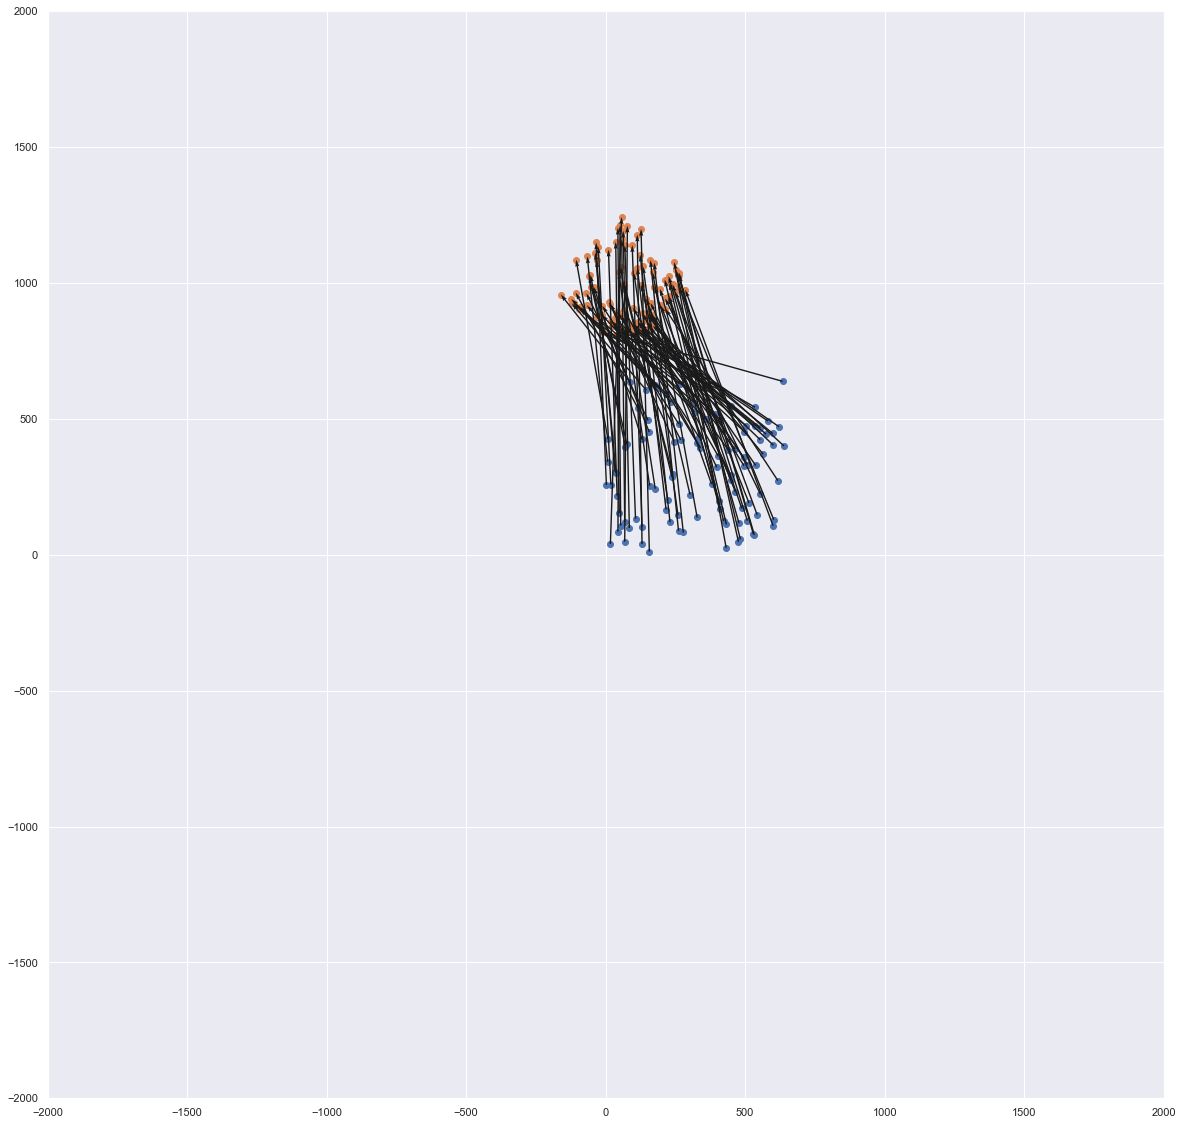

[[-0.22428768 -0.97452298  0.        ]
 [ 0.97452298 -0.22428768  0.        ]
 [ 0.          0.          1.        ]]
[ 180.            0.74299488 -180.        ]
[  0.           0.         102.96099464]


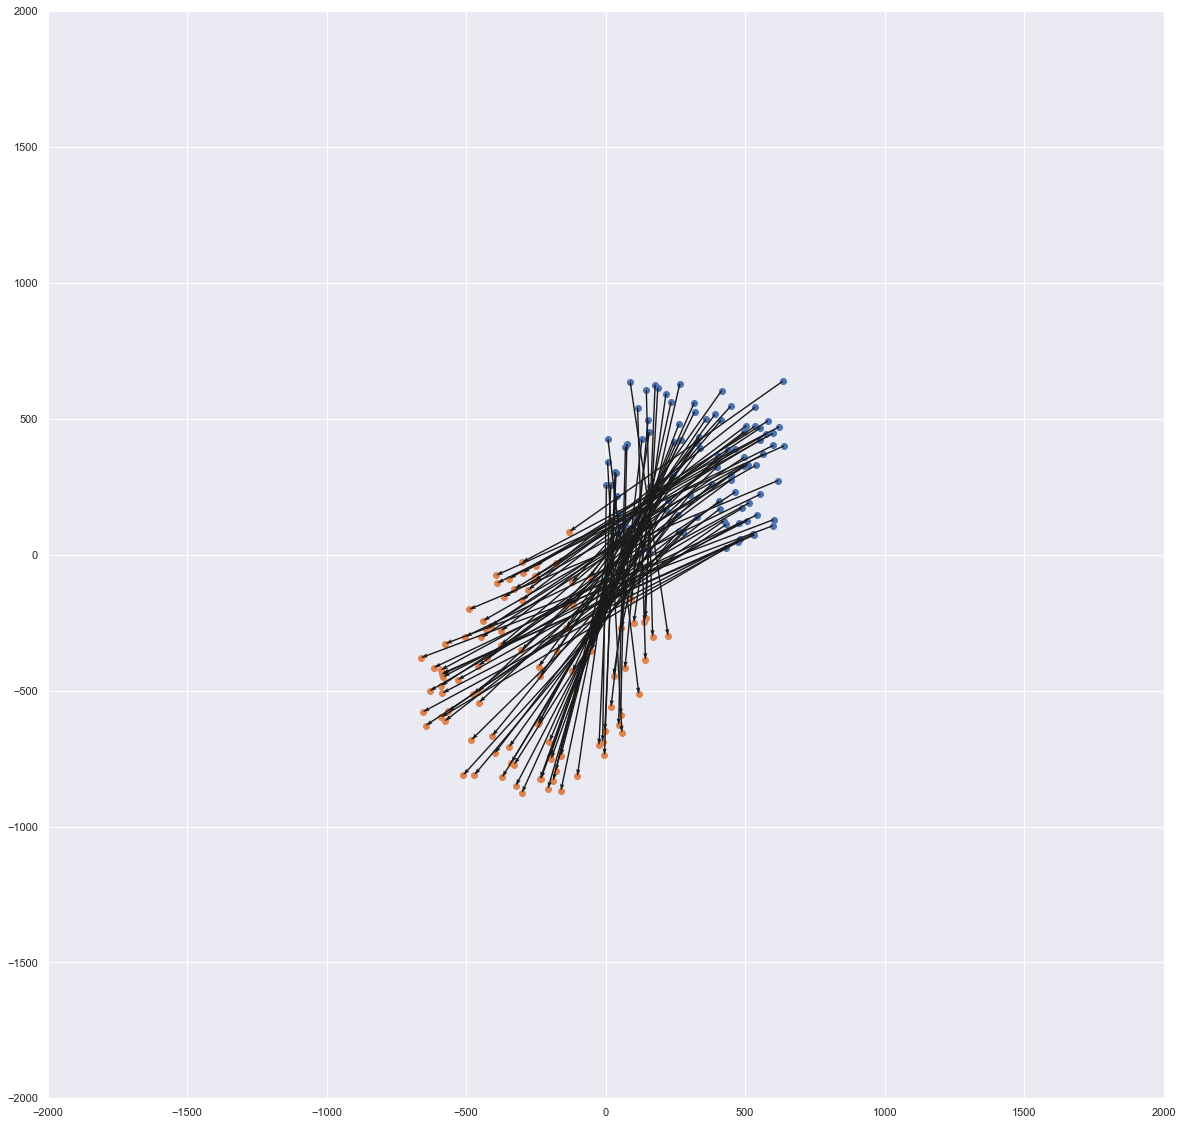

[[ 0.58985937  0.80750599  0.        ]
 [-0.80750599  0.58985937 -0.        ]
 [-0.          0.          1.        ]]
[ 180.            5.87541367 -180.        ]
[  0.          0.        -53.8529709]


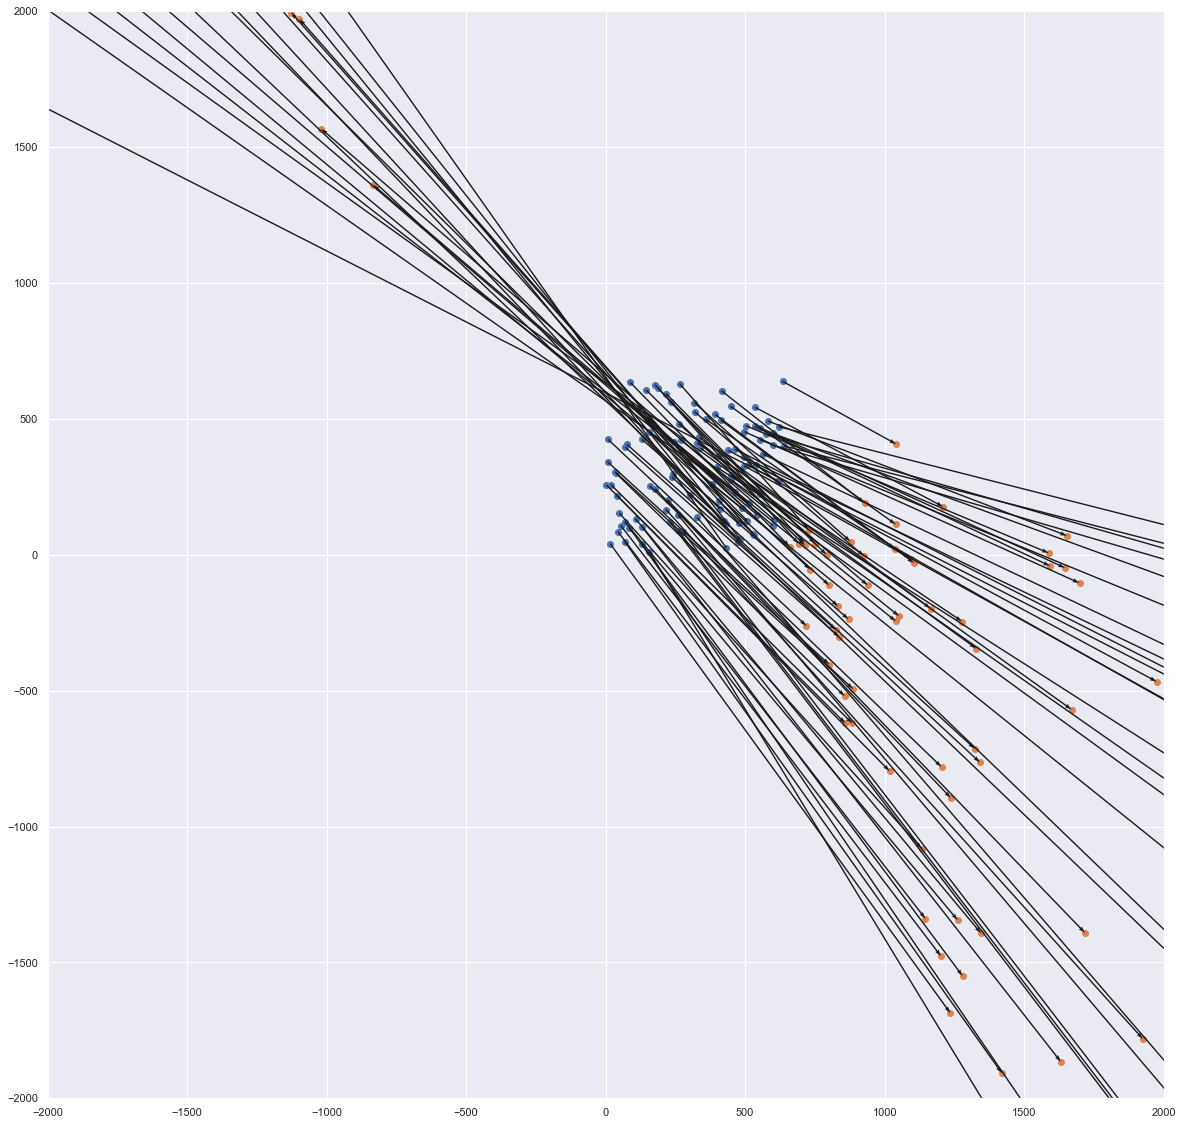

[[-0.99309427 -0.11731907  0.        ]
 [ 0.11731907 -0.99309427  0.        ]
 [ 0.          0.          1.        ]]
[ 0.         88.64026908  0.        ]
[  0.           0.         173.26259666]


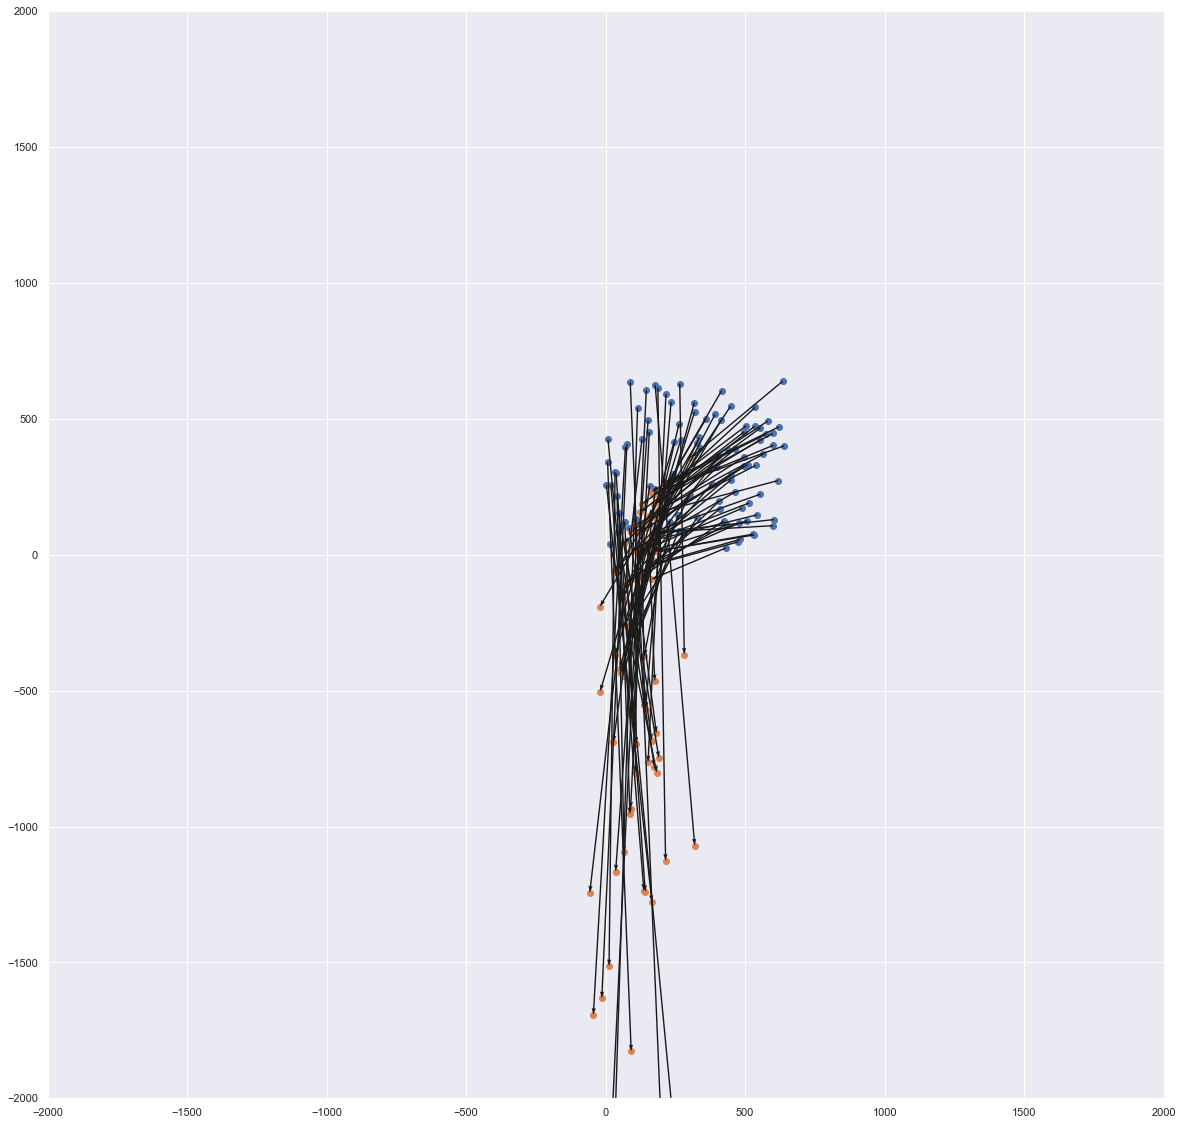

[[-0.22187716  0.97507463  0.        ]
 [-0.97507463 -0.22187716 -0.        ]
 [-0.          0.          1.        ]]
[ 180.          -72.21776769 -180.        ]
[   0.            0.         -102.81931167]


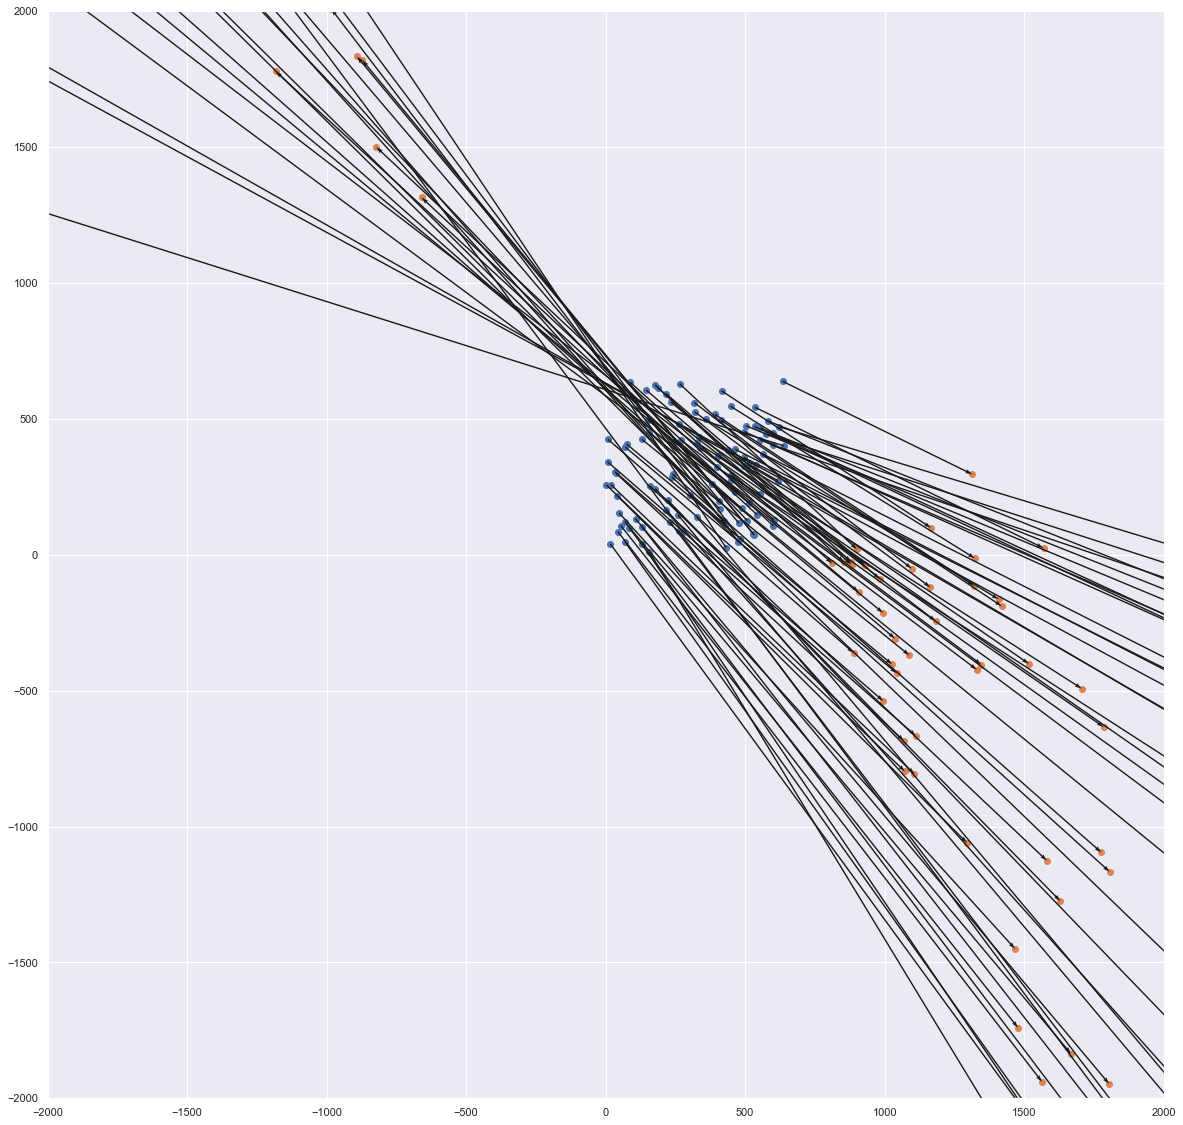

[[ 0.65310921  0.75726373  0.        ]
 [-0.75726373  0.65310921 -0.        ]
 [-0.          0.          1.        ]]
[ 180.           81.78742969 -180.        ]
[  0.           0.         -49.22356452]


In [50]:
BASE = "prerot2"
for p in os.listdir(BASE):
    with open(os.path.join(BASE, p), "rb") as handle:
        scene = pickle.load(handle)
        
    vis_scene(scene)
    rot_mtx = get_prerotation_ls(scene)
    print(rot_mtx)
    
    print(Rotation.from_matrix(scene.R).as_euler("XYZ", degrees=True))
    print(Rotation.from_matrix(rot_mtx).as_euler("XYZ", degrees=True))
    
    # break